In [1]:
import os
import sys
import random
import time
from random import seed, randint
import argparse
import platform
from datetime import datetime
import imp
import numpy as np
import fileinput
from itertools import product
import pandas as pd
from scipy.interpolate import griddata
from scipy.interpolate import interp2d
import seaborn as sns
from os import listdir

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata
import matplotlib as mpl
# sys.path.insert(0,'..')
# from notebookFunctions import *
# from .. import notebookFunctions
from Bio.PDB.Polypeptide import one_to_three
from Bio.PDB.Polypeptide import three_to_one
from Bio.PDB.PDBParser import PDBParser
from pyCodeLib import *
# from small_script.myFunctions import *
sys.path.insert(0, "/Users/weilu/openmmawsem")
from helperFunctions.myFunctions import *
from collections import defaultdict
%matplotlib inline
# plt.rcParams['figure.figsize'] = (10,6.180)    #golden ratio
# %matplotlib notebook
%load_ext autoreload
%autoreload 2

In [2]:
plt.rcParams['figure.figsize'] = np.array([16.18033, 10])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 22})

In [3]:
# pre = "/Users/weilu/Research/server_backup/feb_2019/jan_optimization/gammas/"
# pre = "/Users/weilu/Research/server/april_2019/optimization_test/gammas/"
pre = "/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_4_duplicate/optimization/gammas/"
# pp = "cath-dataset-nonredundant-S20Clean_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0"
# pp = "proteins_name_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"
pp = f"protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0"

A_name = pp + "_A"
B_name = pp + "_B"
B_filtered_name = pp + "_B_filtered"
P_name = pp + "_P"
Gamma_name = pp + "_gamma"
Gamma_filtered_name = pp + "_gamma_filtered"
Lamb_name = pp + "_lamb"
Lamb_filtered_name = pp + "_lamb_filtered"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)
B_filtered = np.loadtxt(pre+B_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Gamma = np.loadtxt(pre+Gamma_name)
Gamma_filtered = np.loadtxt(pre+Gamma_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb = np.loadtxt(pre+Lamb_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})
Lamb_filtered = np.loadtxt(pre+Lamb_filtered_name, dtype=complex, converters={
                           0: lambda s: complex(s.decode().replace('+-', '-'))})

half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)


# pre = "/Users/weilu/Research/server/april_2019/"
location = pre + "../../phis/protein_list_phi_pairwise_contact_well4.5_6.5_5.0_10phi_density_mediated_contact_well6.5_9.5_5.0_10_2.6_7.0phi_burial_well4.0_phi_decoy_summary.txt"
A_prime = np.loadtxt(location)





/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


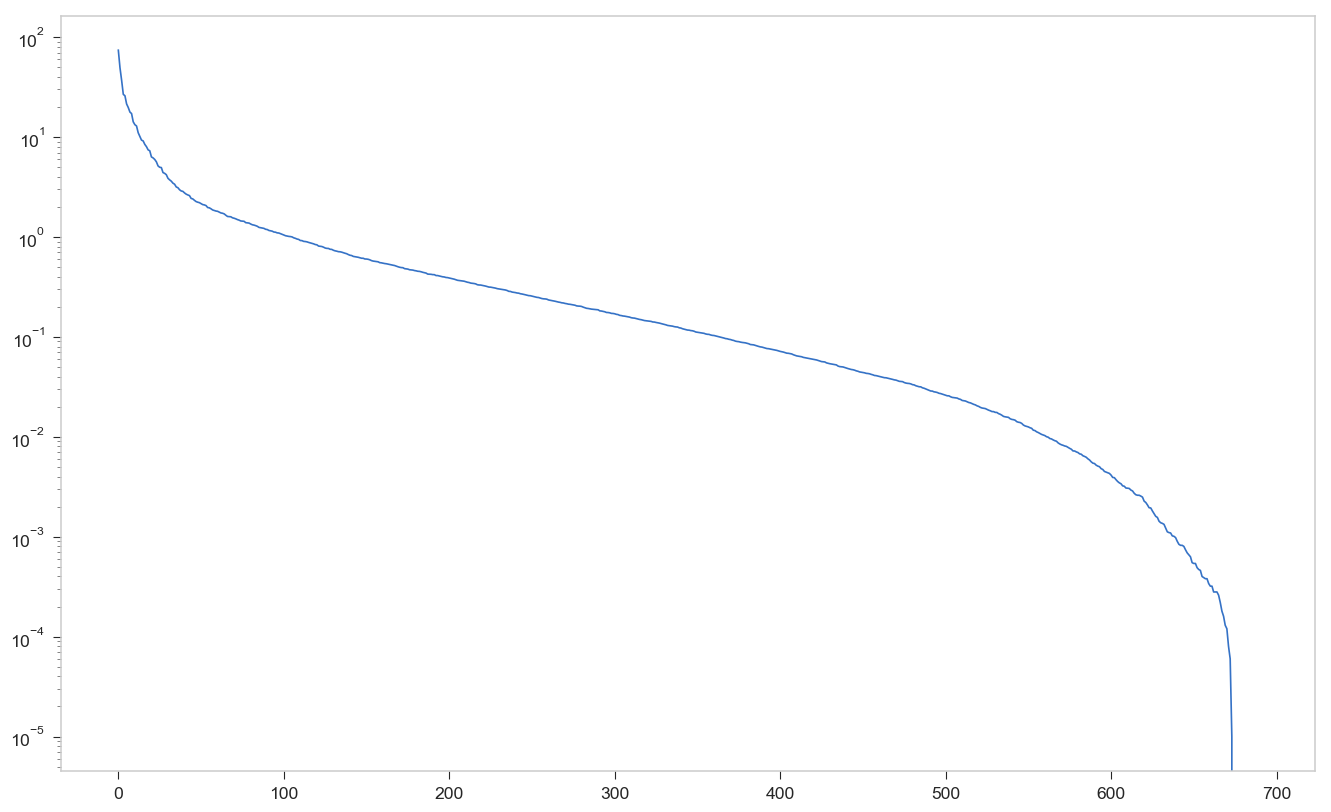

In [7]:
plt.plot(Lamb)
plt.yscale("log")

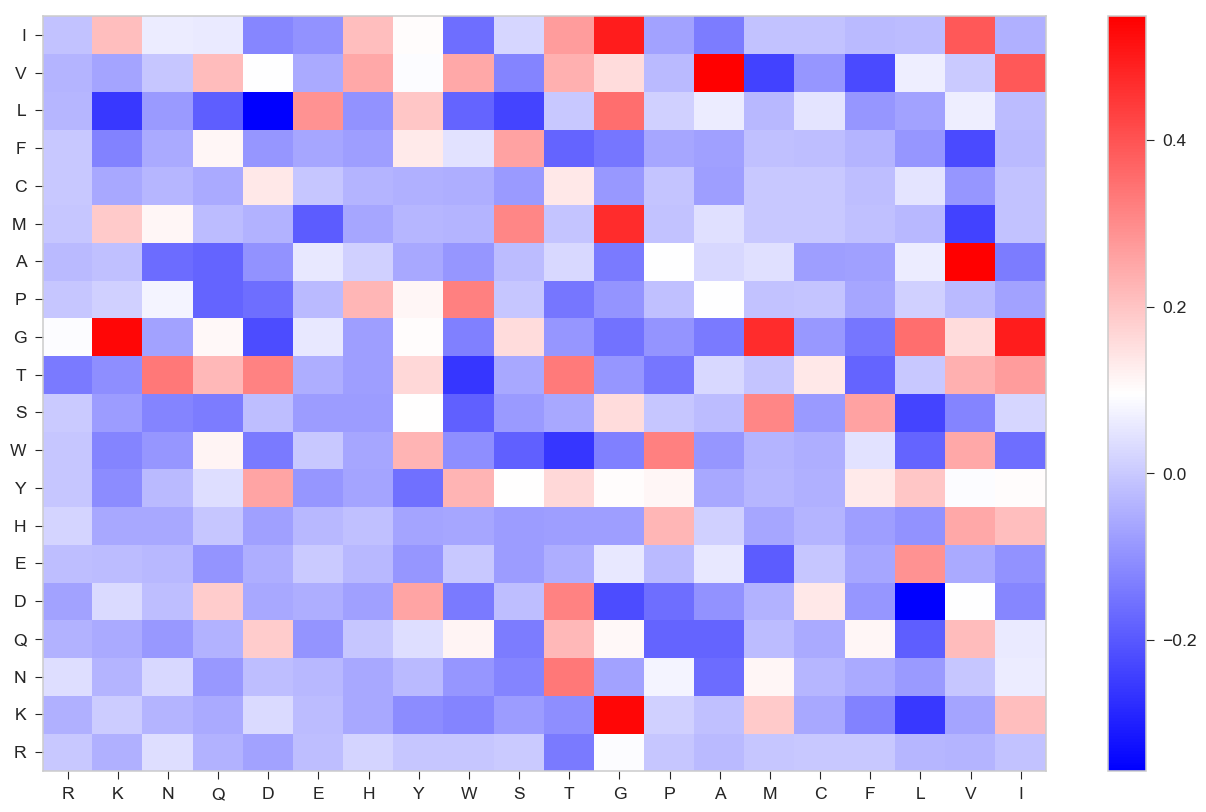

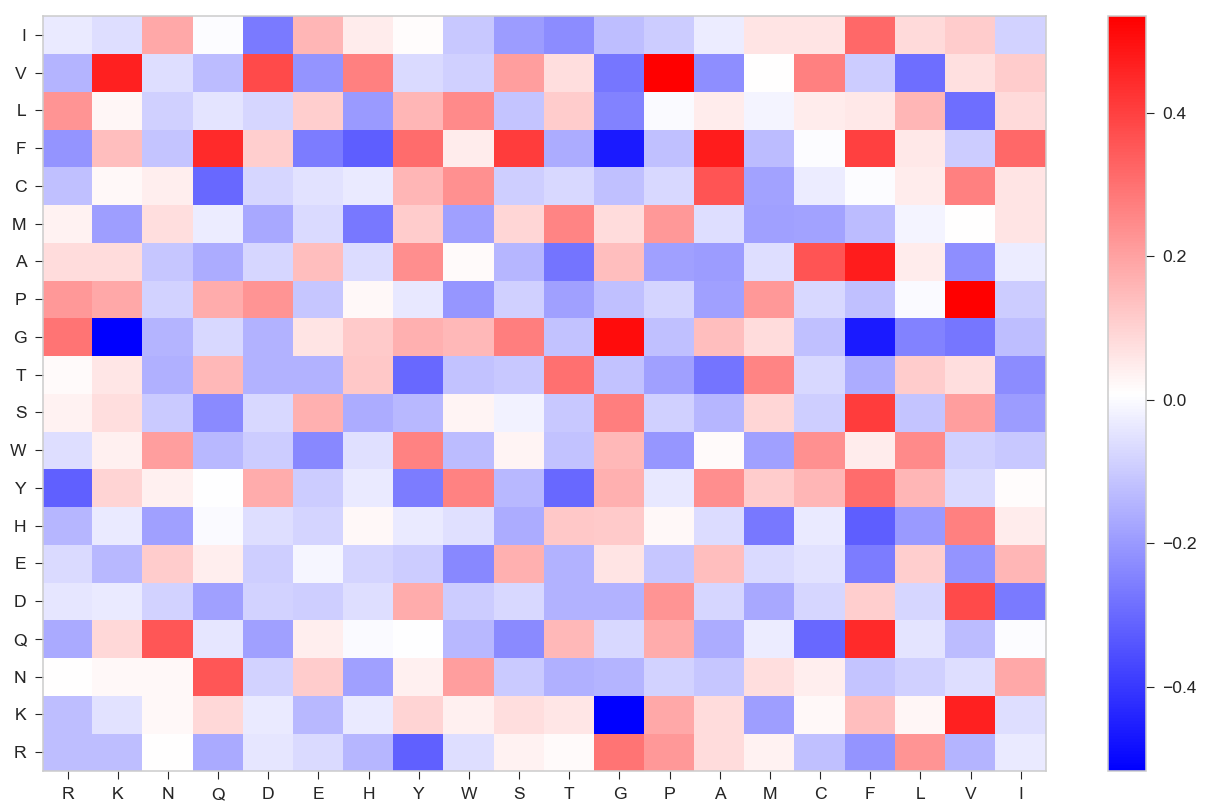

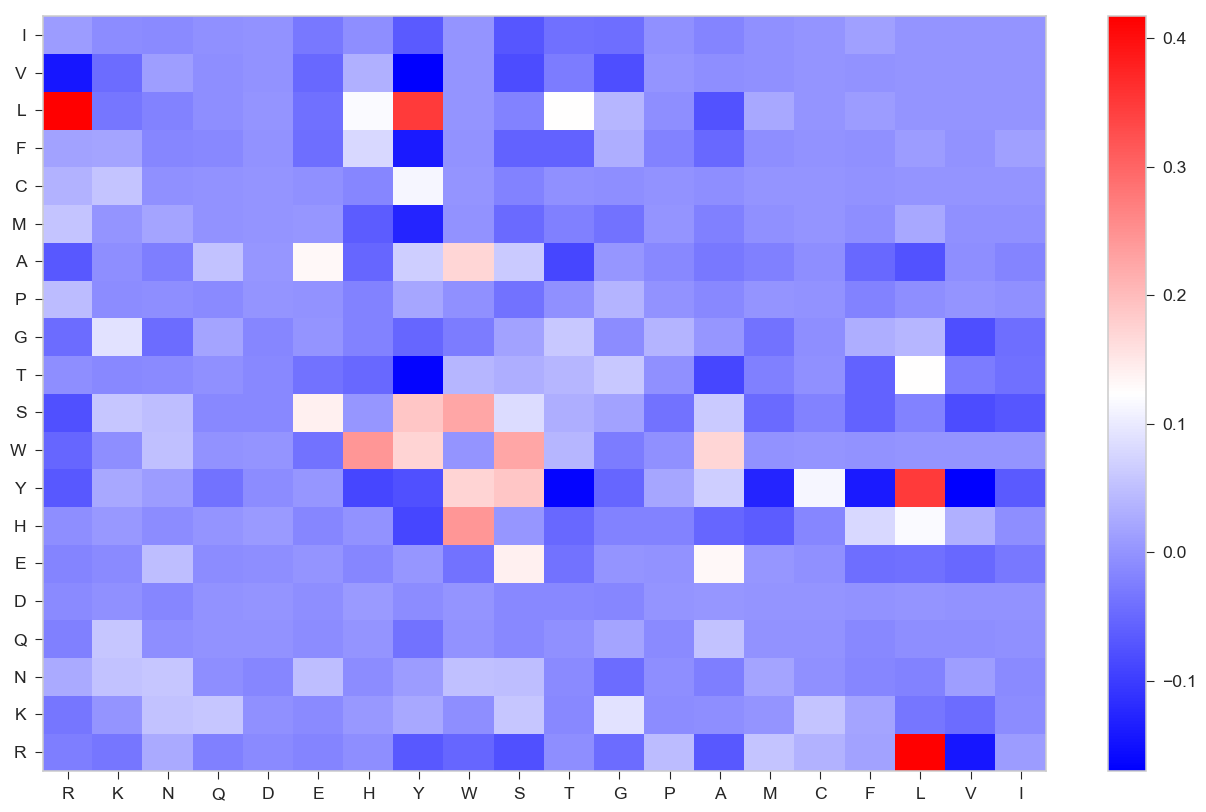

In [4]:
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = 400
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb, 
                                                                   cutoff_mode, P)
filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)
plot_contact_well(filtered_gamma[:210], inferBound=True)
plot_contact_well(filtered_gamma[210:420], inferBound=True)
plot_contact_well(filtered_gamma[420:], inferBound=True)

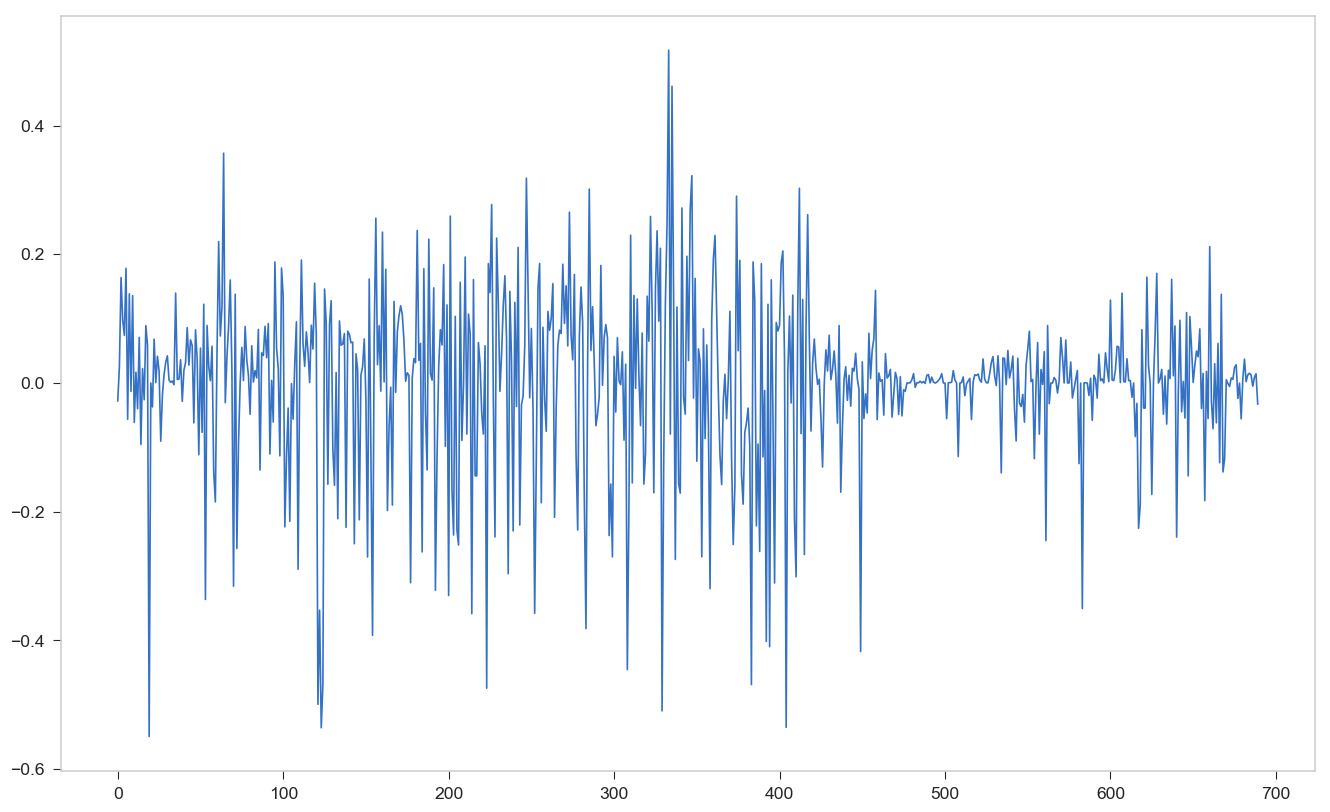

In [8]:
plt.plot(filtered_gamma)

In [9]:
# maximum difference between loaded and computed is 1e-5.
max(lamb-Lamb)

(1.3045140913714448e-05+0j)

In [10]:
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/trial_4_cutoff400", filtered_gamma)

In [11]:
# os.chdir('/Users/weilu/opt/notebook/Optimization')

In [12]:
gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/original_gamma"
original_gamma = np.loadtxt(gamma_file_name)

In [13]:
np.dot(A_prime, original_gamma)

-571.0807879751281

In [14]:
# we want to impose additional contraint so that A' * gamma = constnat.(-562.23)
c = np.dot(A_prime, original_gamma)
B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime) )
gamma_new = B_inv.dot(A-A_prime*lambda_2)

In [15]:
np.dot(A_prime, gamma_new)

-571.080787975128

In [16]:
# impose A'gamma
save_gamma_pre = "/Users/weilu/Research/server/sep_2019/saved_gammas/"
np.savetxt(f"{save_gamma_pre}/trial_4_cutoff400_impose_Aprime_constraint", gamma_new)

In [17]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_4_duplicate/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint"

data = validate_hamiltonian_wei("phi_list.txt", "protein_list", gamma_file_name, "shuffle", 1000, mode=0)
data


0 3.508959112034475


,Protein,Z_scores,E_native,E_mgs,Std_mg
0,1BD2,3.508959,-590.408659,-576.119892,4.072082
1,2JCC,6.406843,-607.314444,-577.222713,4.696811
2,1AO7,5.530768,-592.327551,-569.008721,4.216201
3,1LP9,6.310993,-622.609479,-592.084044,4.836867
4,3QDJ,4.901757,-606.525572,-584.644281,4.463969
5,3GSN,1.854756,-580.017867,-572.453867,4.078164
6,1QRN,4.838191,-602.786617,-582.219358,4.251023
7,3PWP,6.154082,-600.250600,-574.765083,4.141238
8,5W1W,1.467168,-506.193262,-499.628928,4.474153
9,1QSE,5.029028,-592.782661,-572.004454,4.131655


In [18]:
def output_E_decoy(hamiltonian, training_set_file, gamma_file_name, training_decoy_method, num_decoys, test_set_file=None, test_decoy_method=None, use_filtered_gammas=False, **kwargs):
    if test_set_file is None:
        test_set_file = training_set_file
    if test_decoy_method is None:
        test_decoy_method = training_decoy_method
    test_set = read_column_from_file(test_set_file, 1)
    z_scores = []
    e_natives = []
    e_mgs = []
    e_mg_stds = []
    e_decoys = []
    names = []
    for i, protein in enumerate(test_set):
#         print(i, protein)
        print(protein, hamiltonian, training_set_file, gamma_file_name, test_decoy_method, num_decoys, use_filtered_gammas)
        e_native, e_decoy = evaluate_hamiltonian_wei(
            protein, hamiltonian, training_set_file, gamma_file_name, test_decoy_method, num_decoys, use_filtered_gammas, outputDecoy=True, **kwargs)
        # print(protein, z)
        e_natives.append(e_native)
        e_decoys.append(e_decoy)
        names.append(protein)
    return names, e_natives, e_decoys

os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_trial_4/optimization/")
# gamma_file_name = "gamma_iter1_combined_mar06.dat"
# gamma_file_name = "/Users/weilu/Research/server/sep_2019/peptide_optimization/saved_gammas/cutoff100"
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint"

names, e_natives, e_decoys = output_E_decoy("phi_list.txt", "protein_list", gamma_file_name, "shuffle", 1000, mode=0)



1BD2 phi_list.txt protein_list /Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint shuffle 1000 False
2JCC phi_list.txt protein_list /Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint shuffle 1000 False
1AO7 phi_list.txt protein_list /Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint shuffle 1000 False
1LP9 phi_list.txt protein_list /Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint shuffle 1000 False
3QDJ phi_list.txt protein_list /Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint shuffle 1000 False
3GSN phi_list.txt protein_list /Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint shuffle 1000 False
1QRN phi_list.txt protein_list /Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff400_impose_Aprime_constraint shuffle 100

/Users/weilu/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


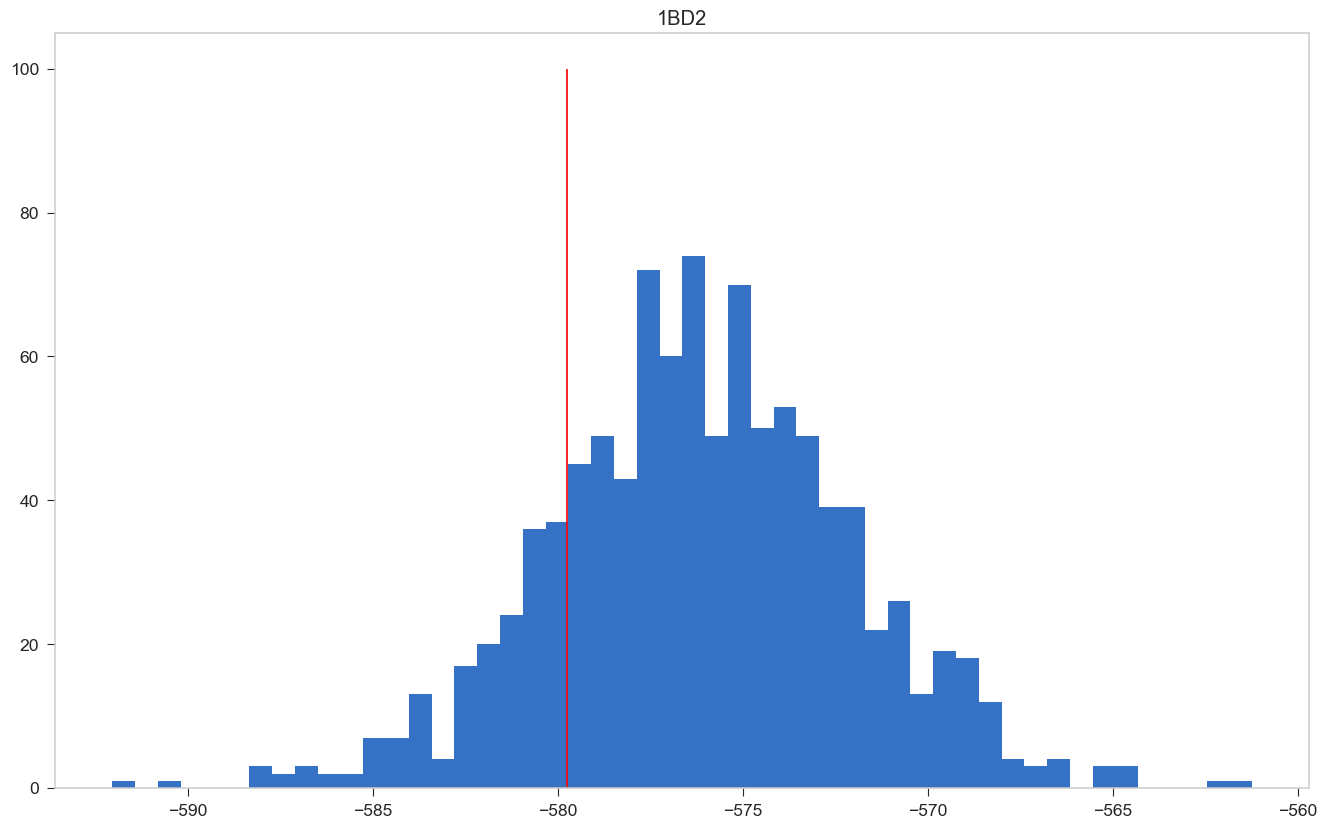

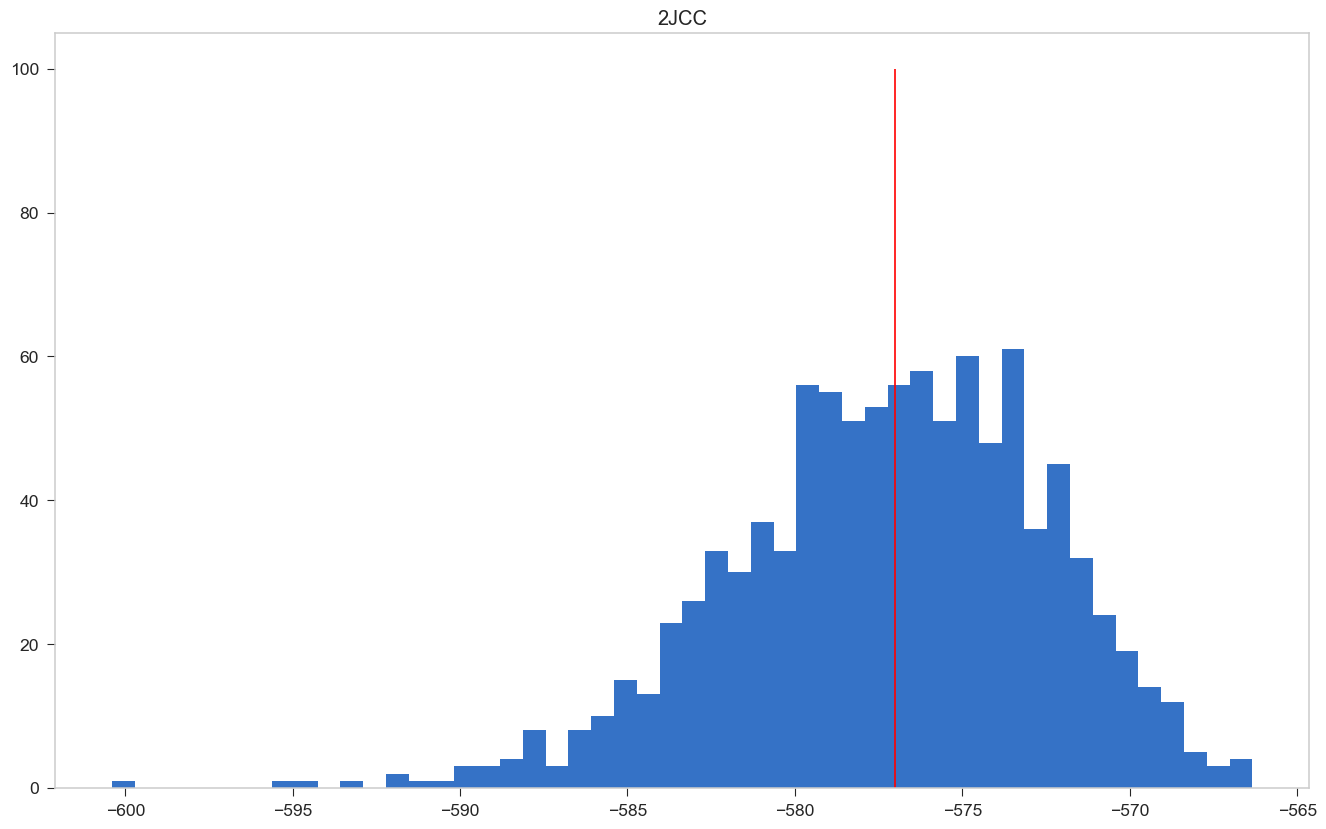

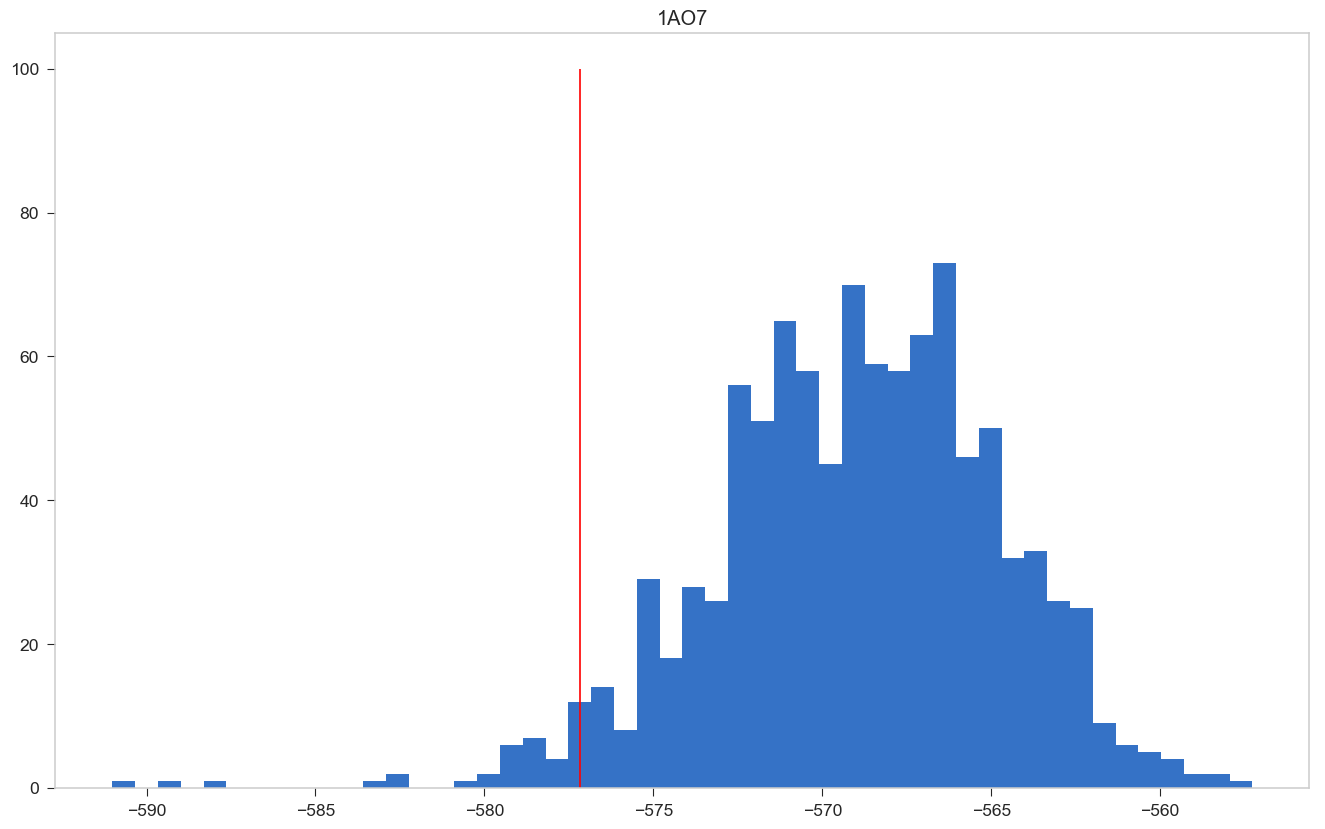

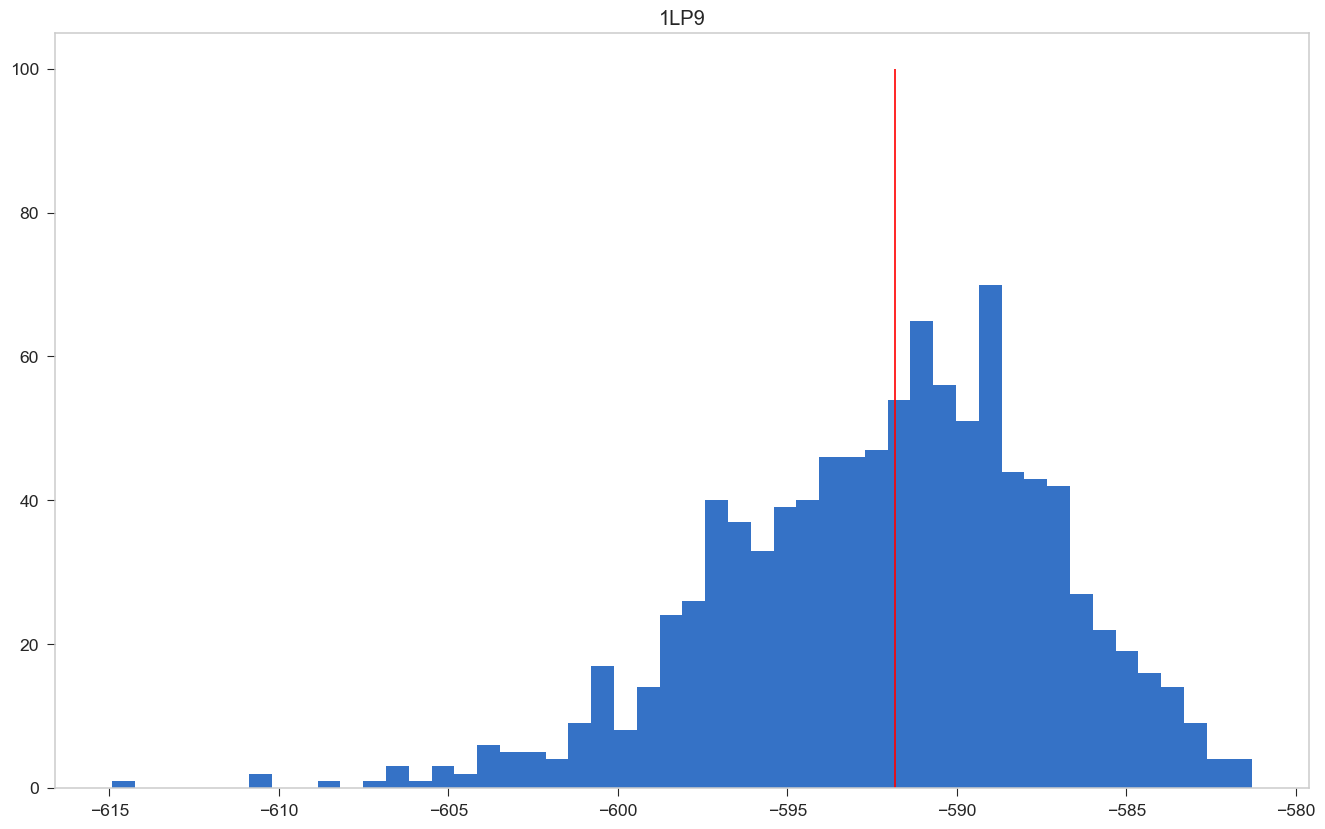

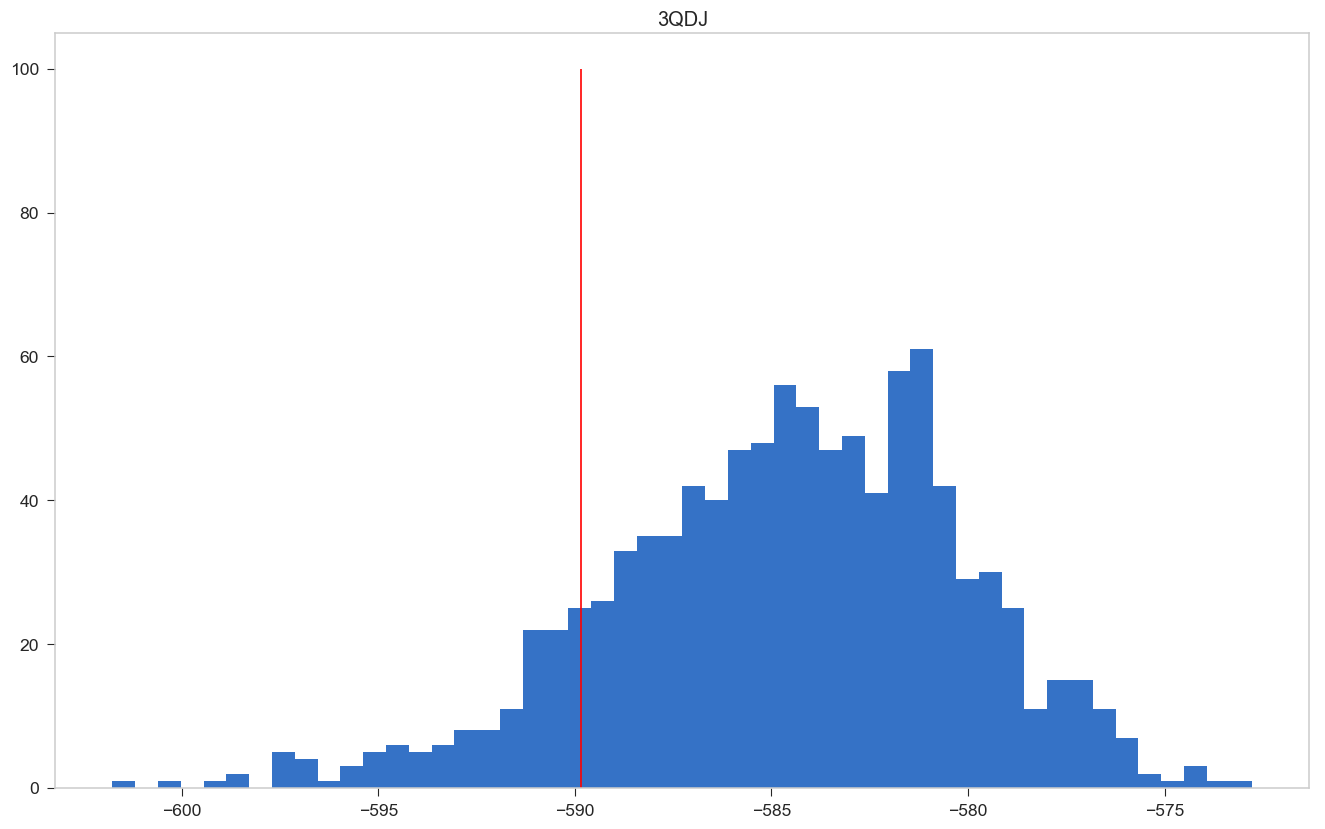

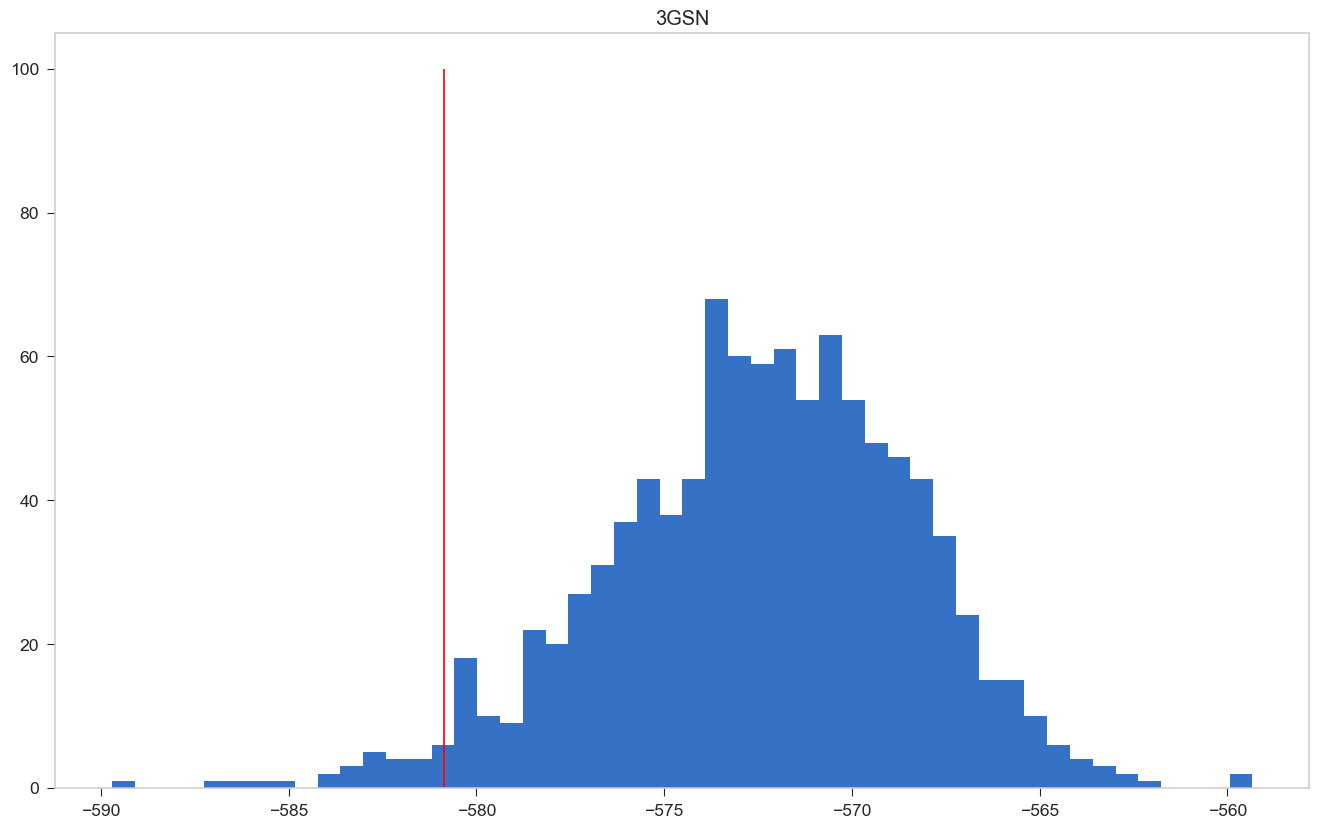

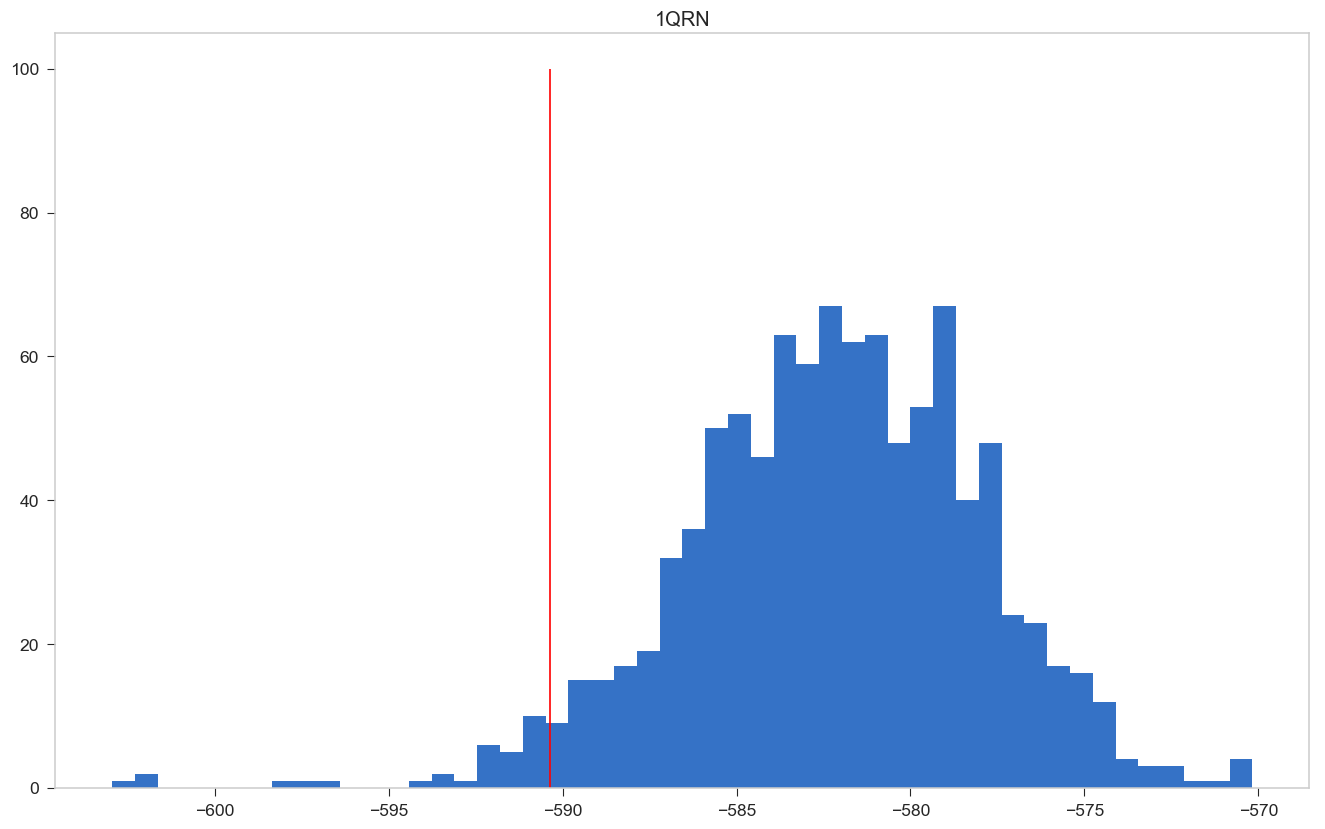

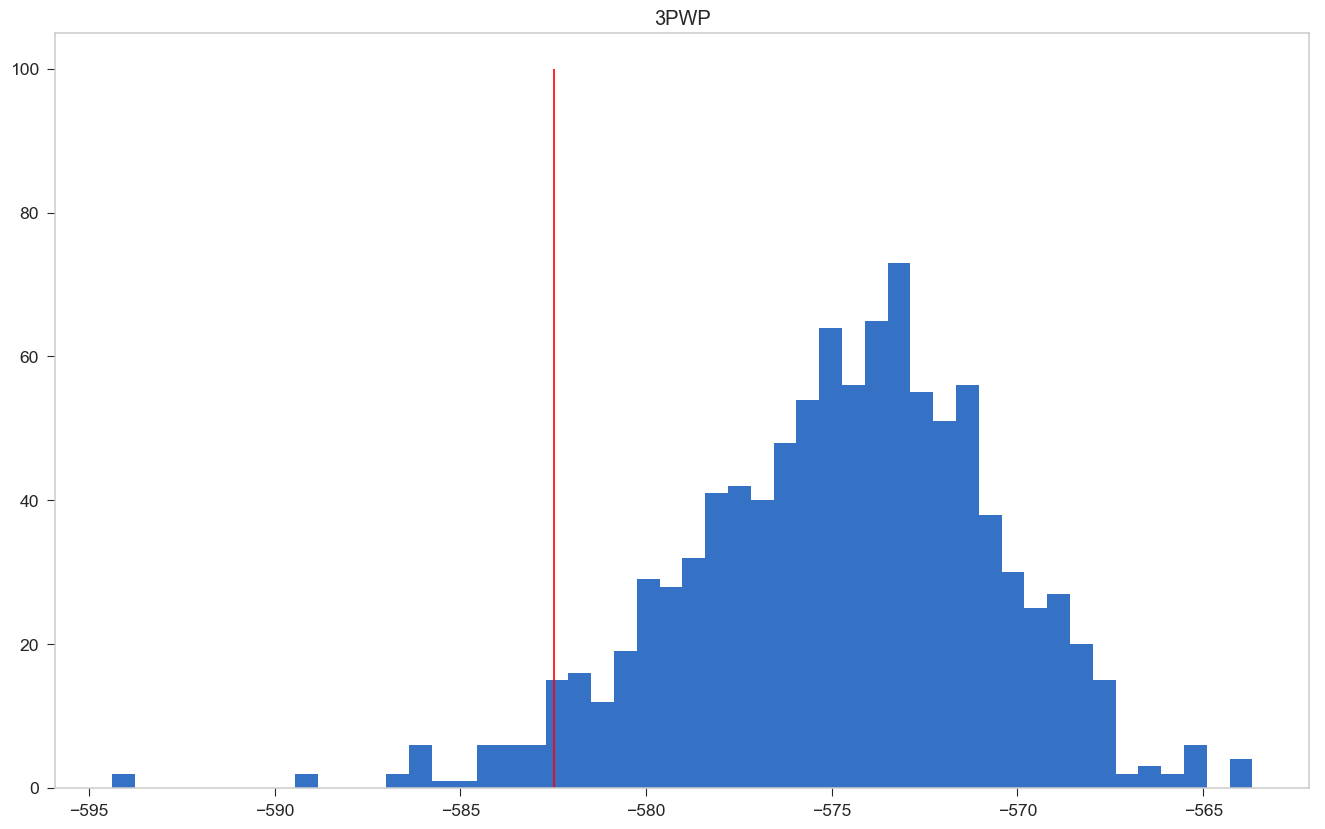

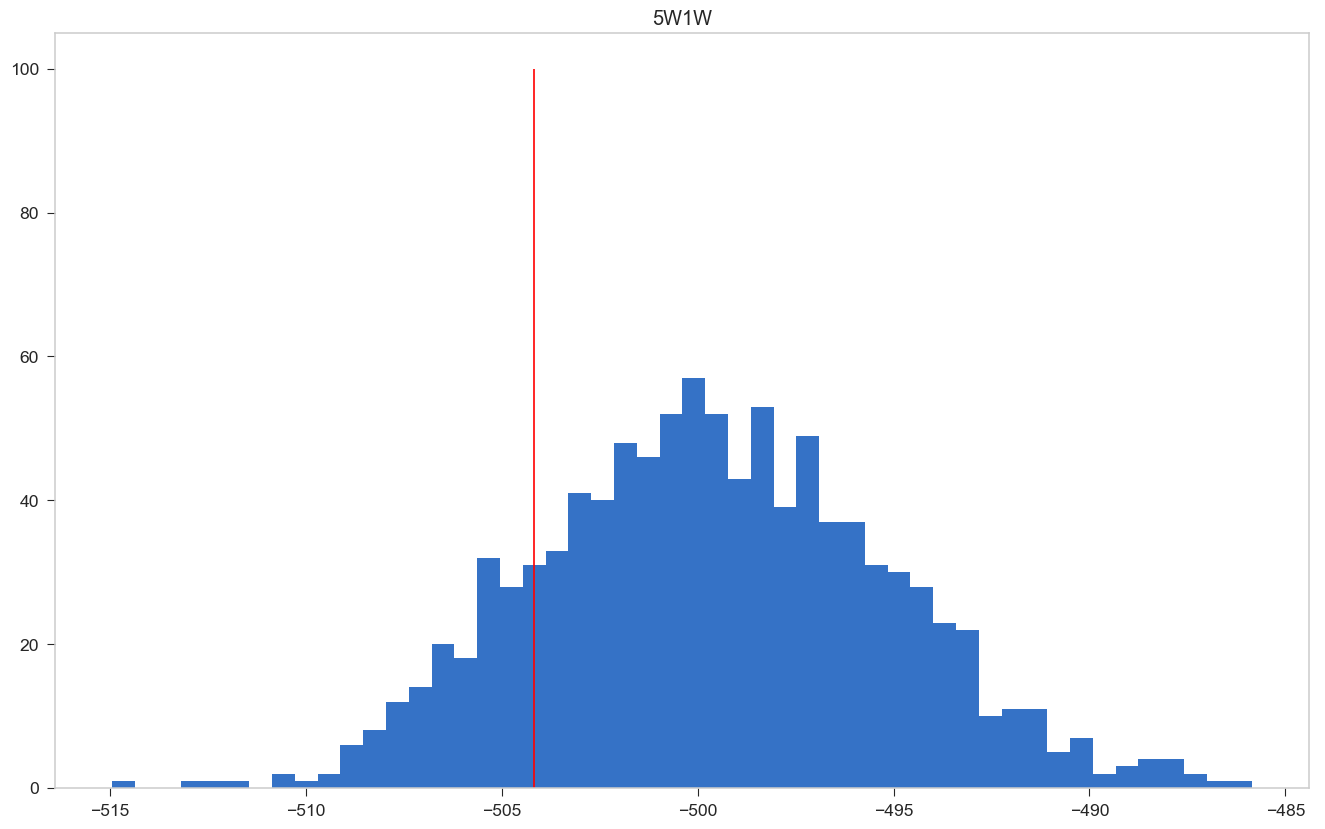

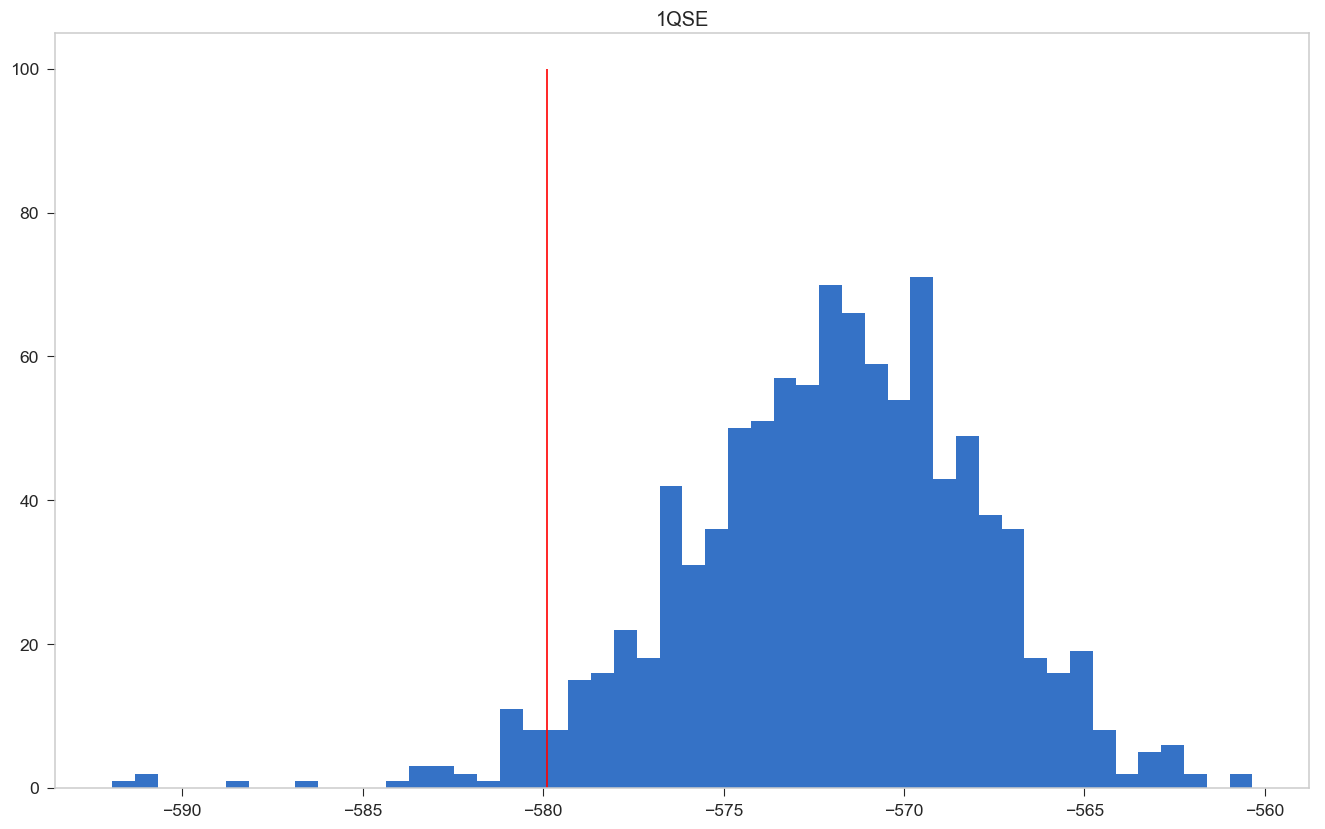

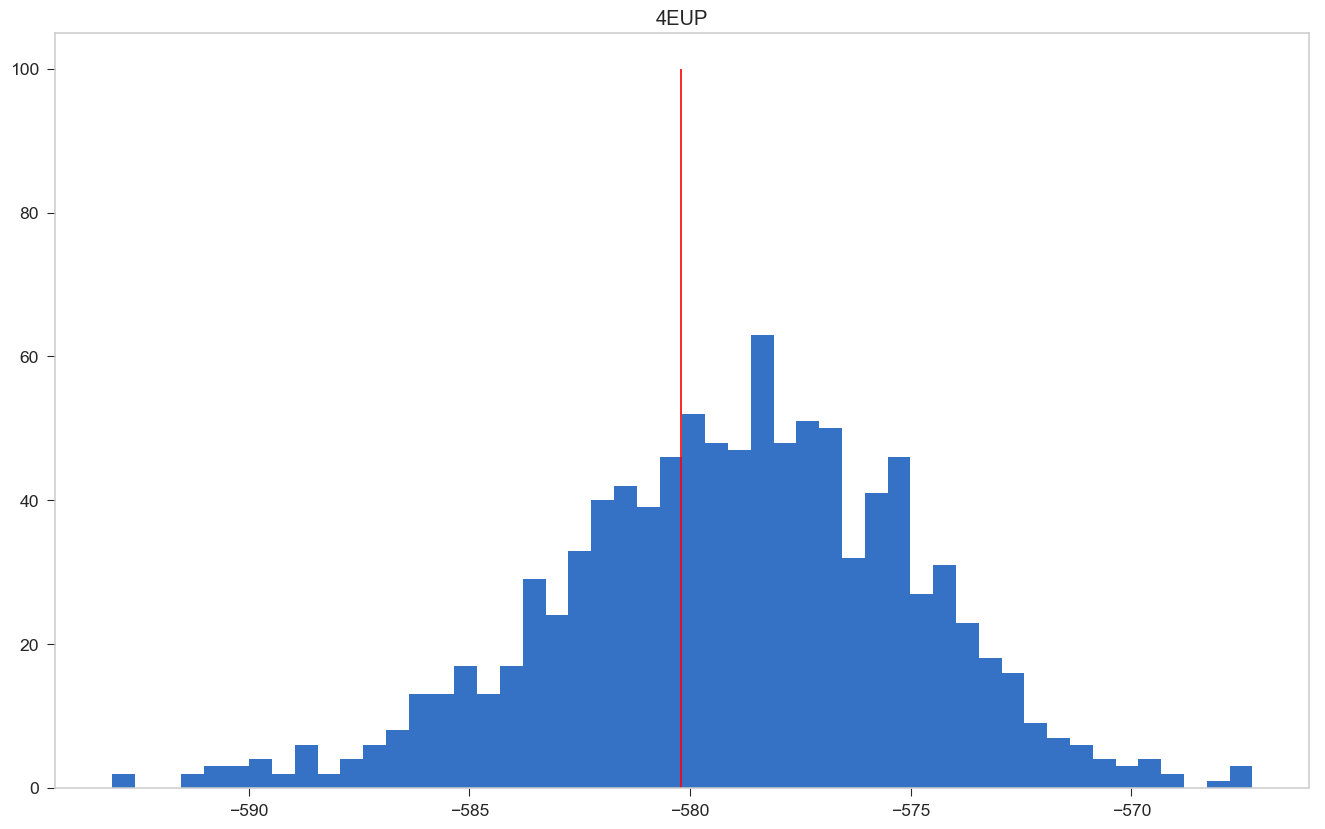

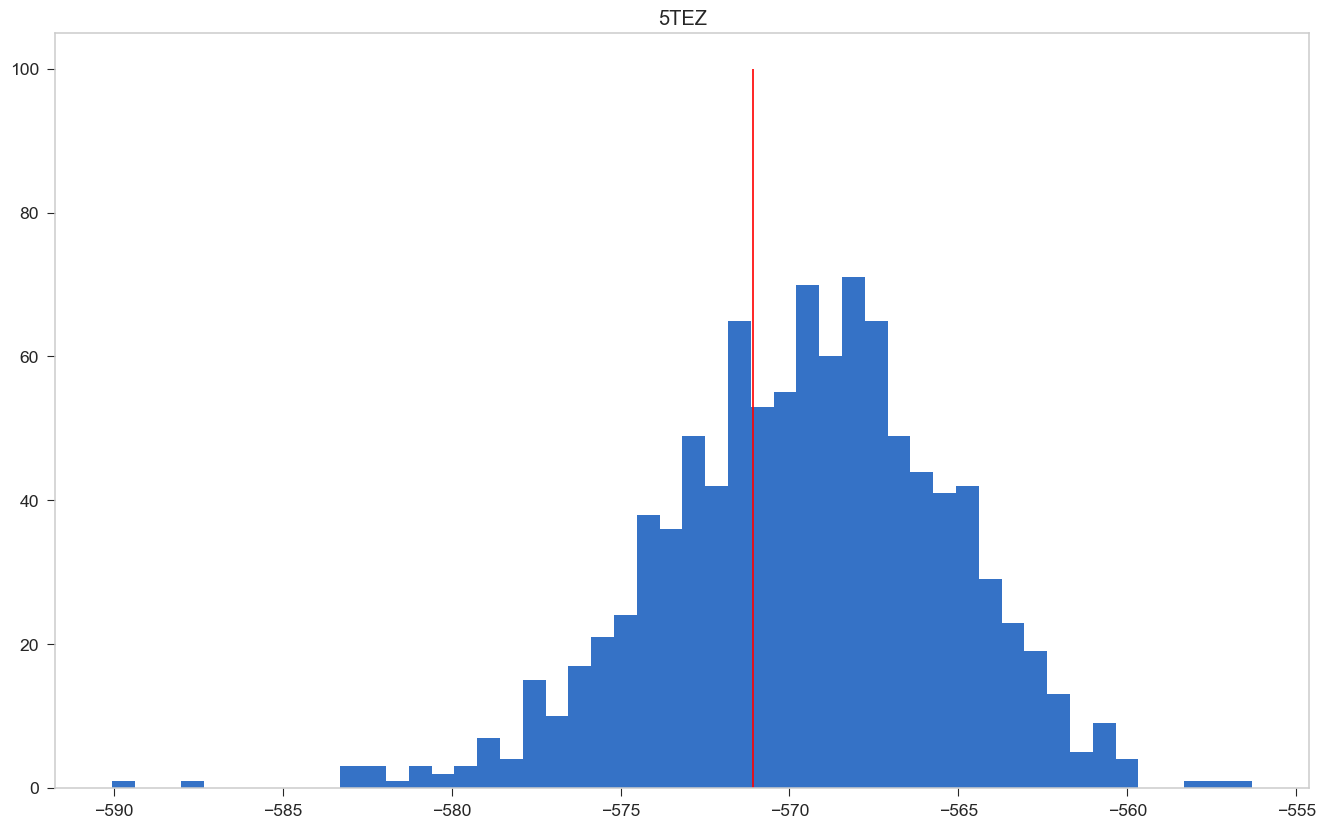

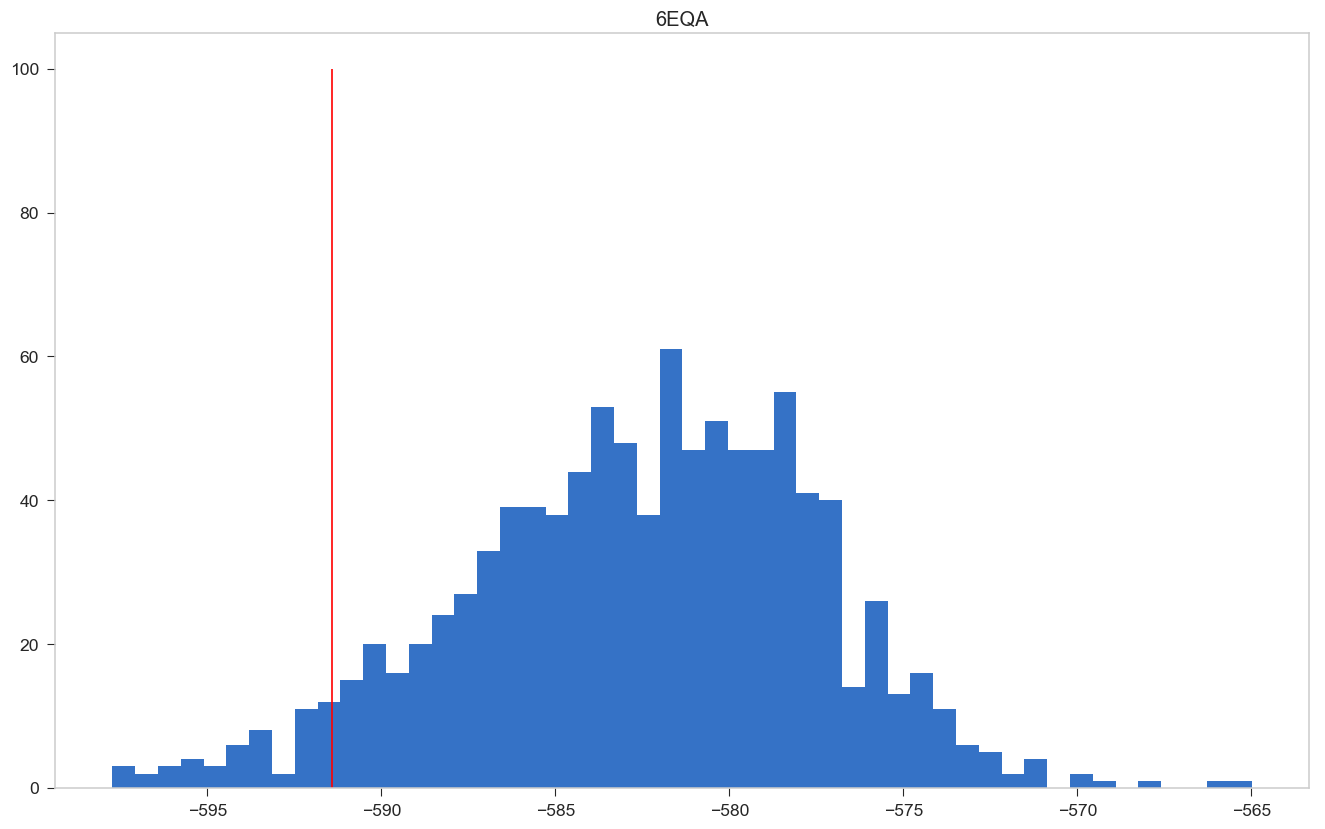

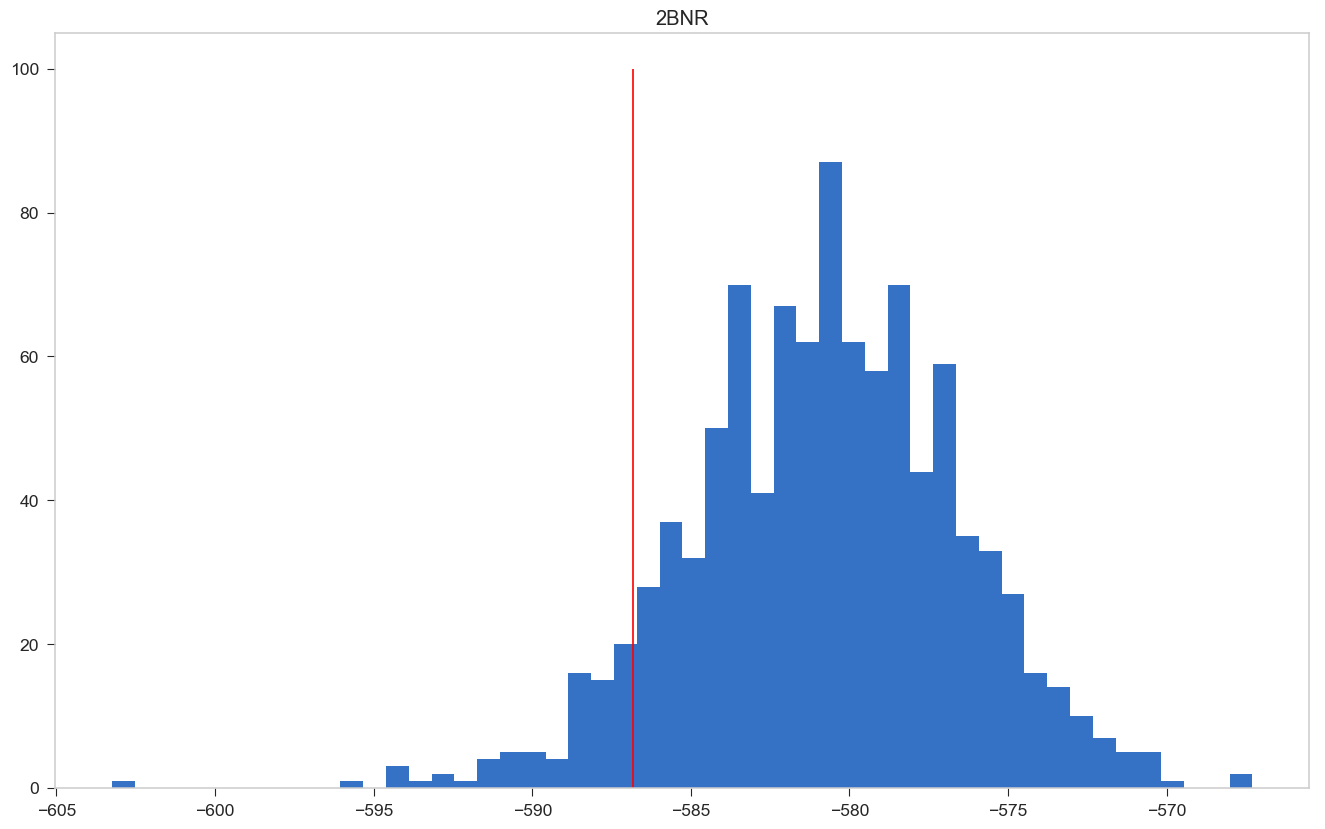

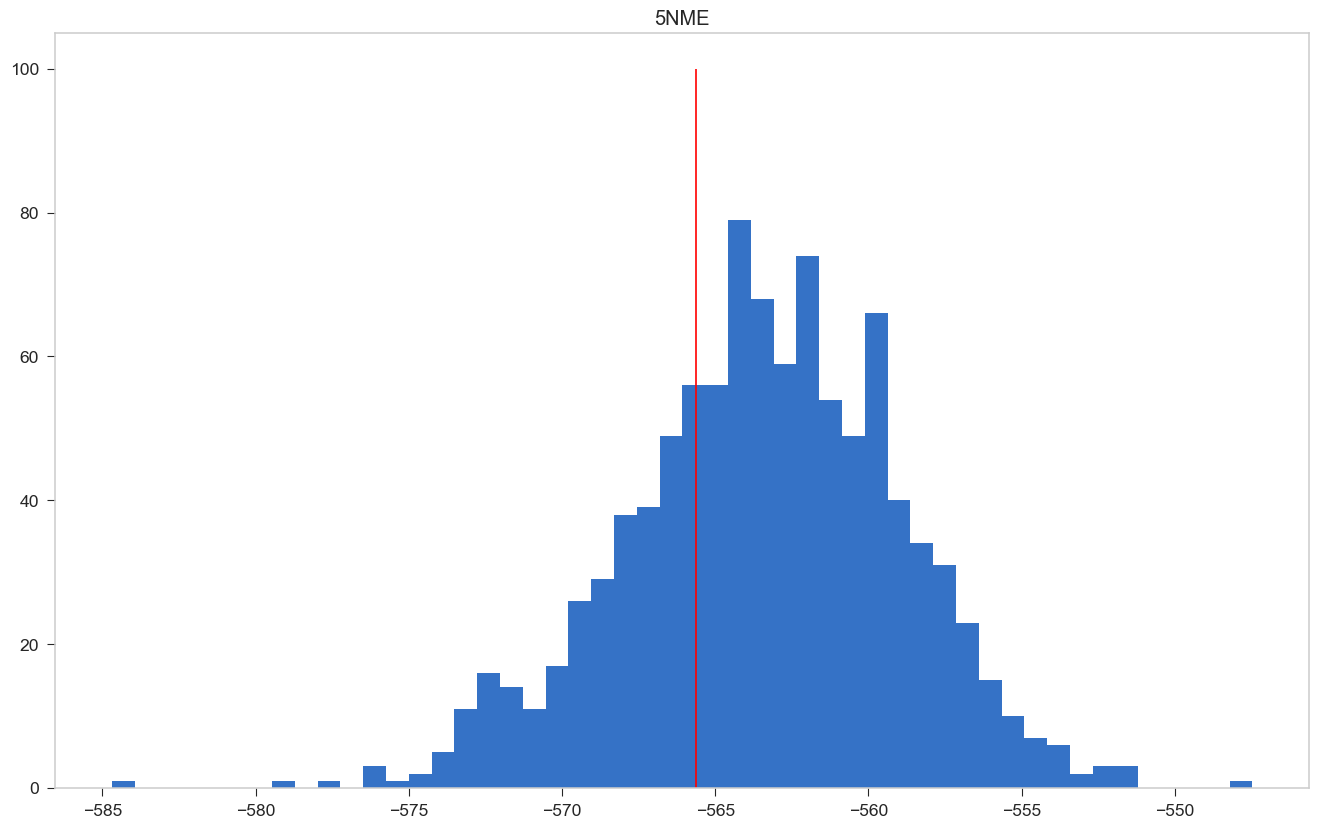

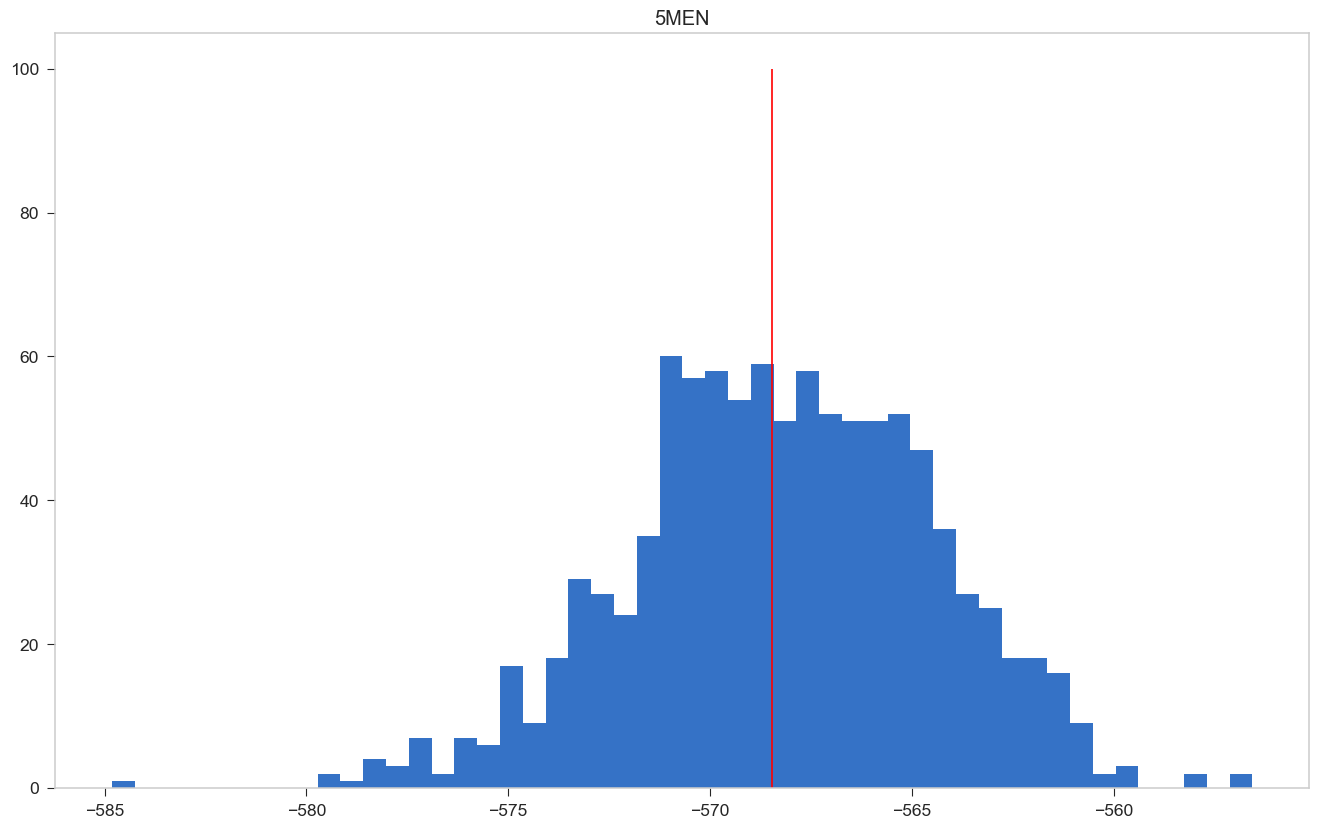

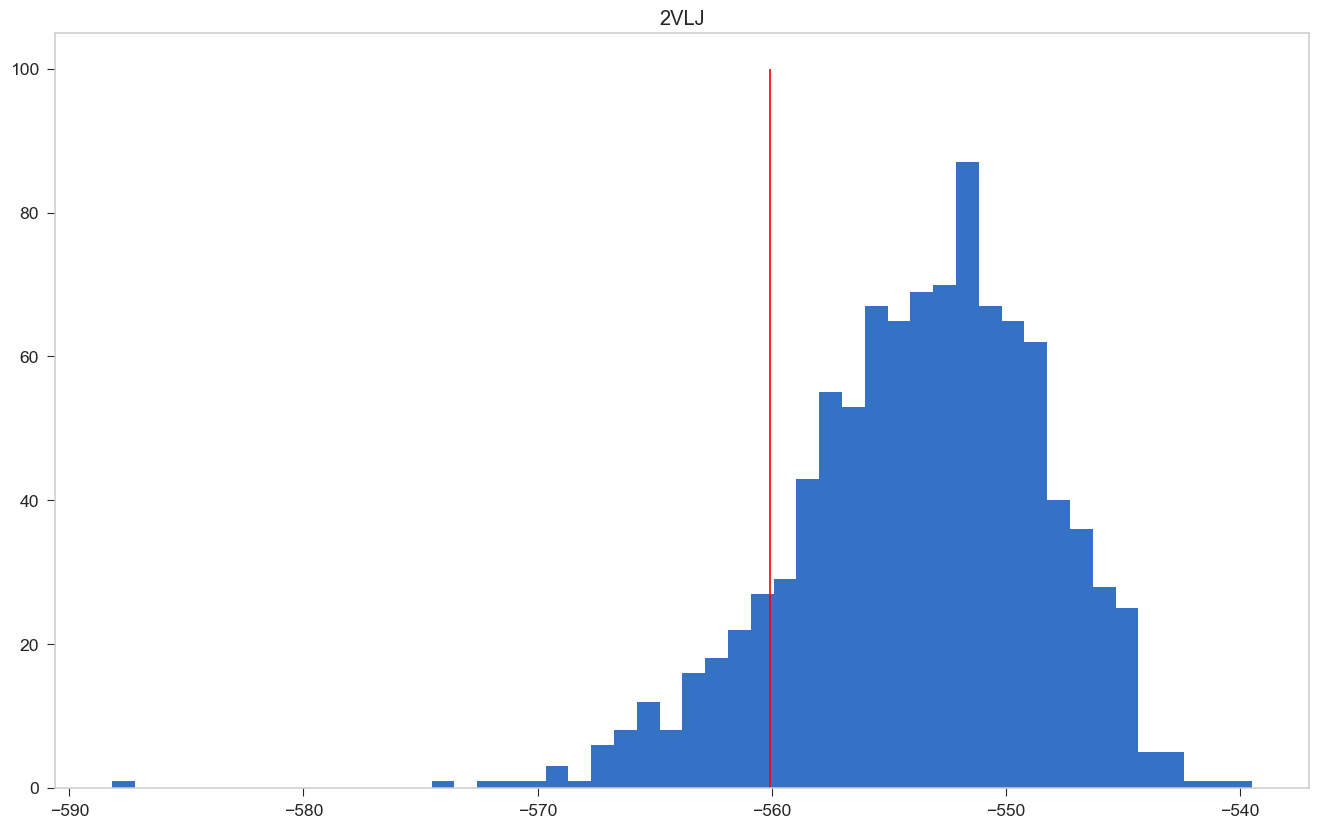

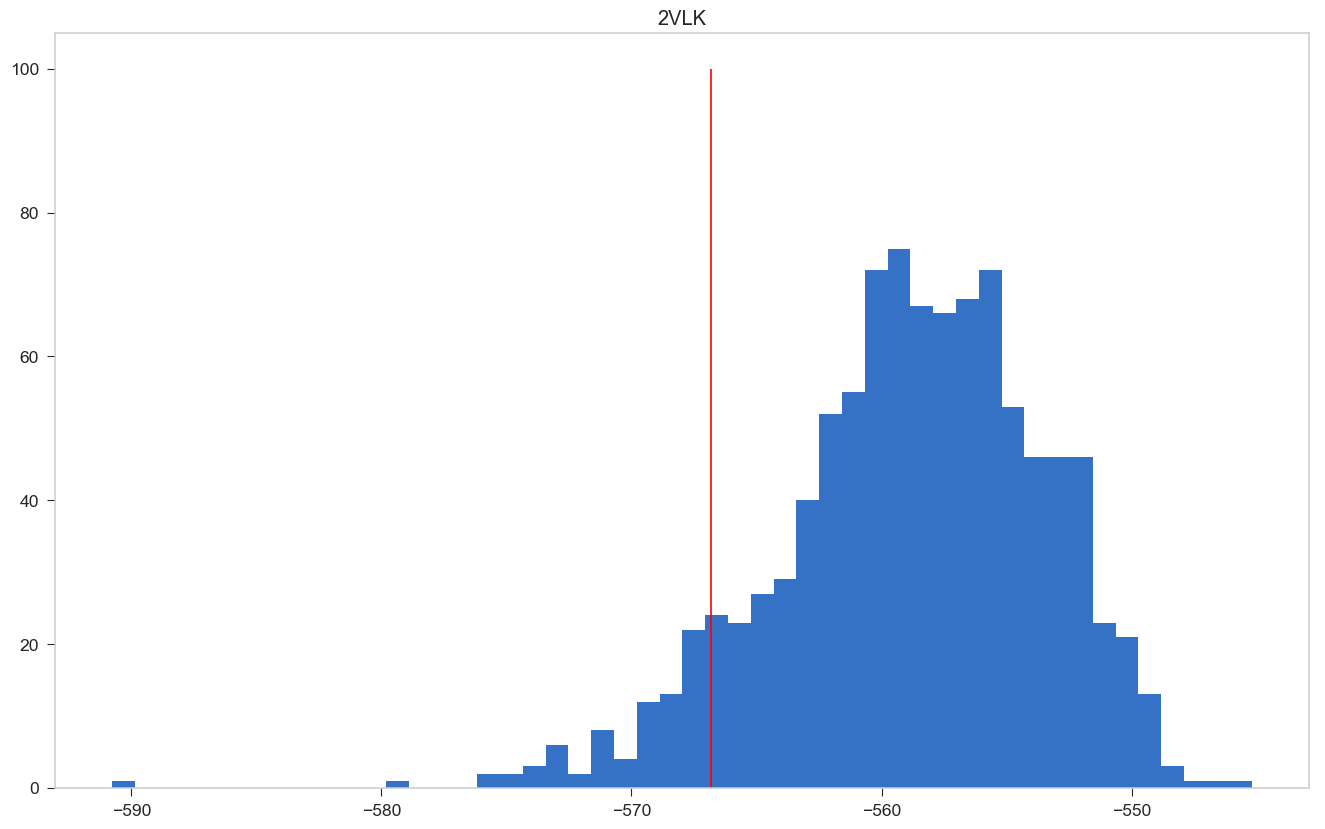

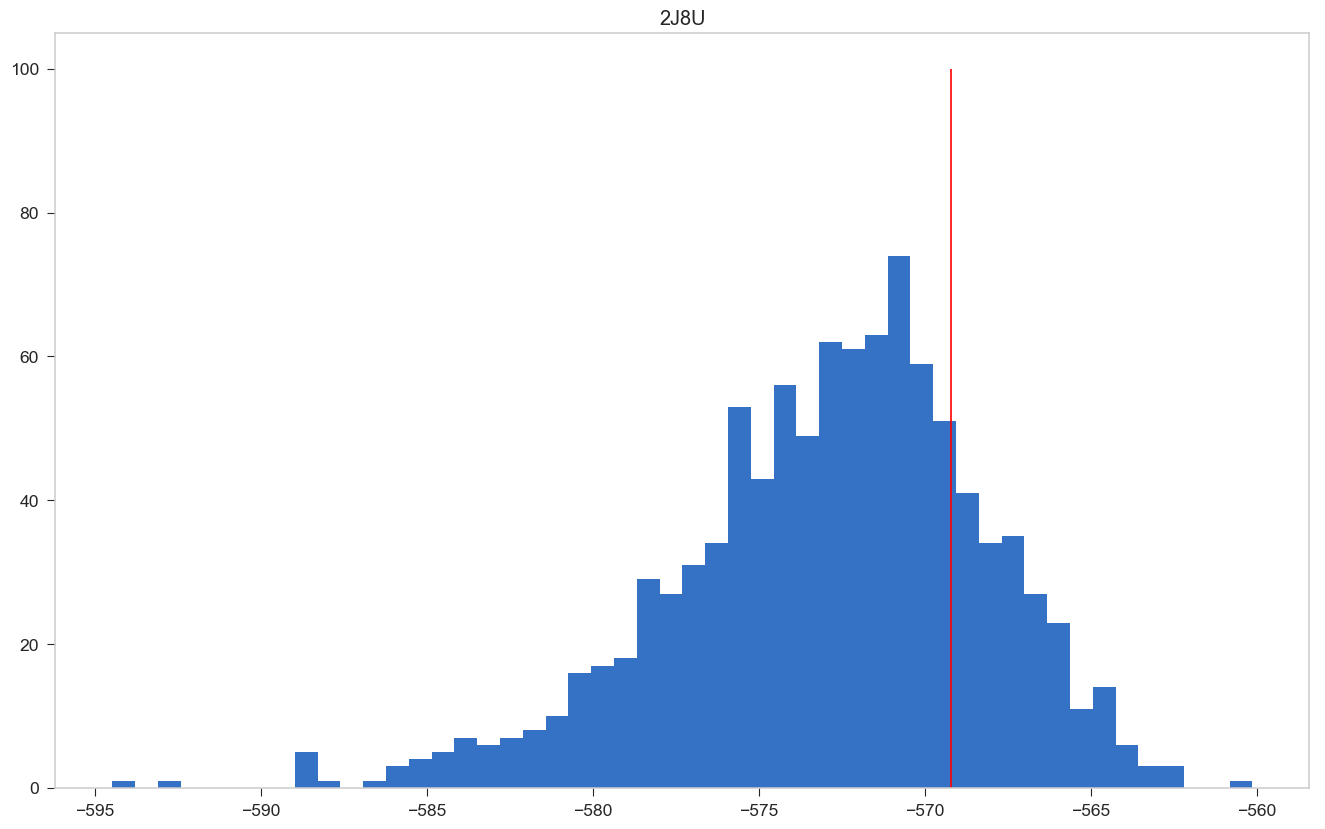

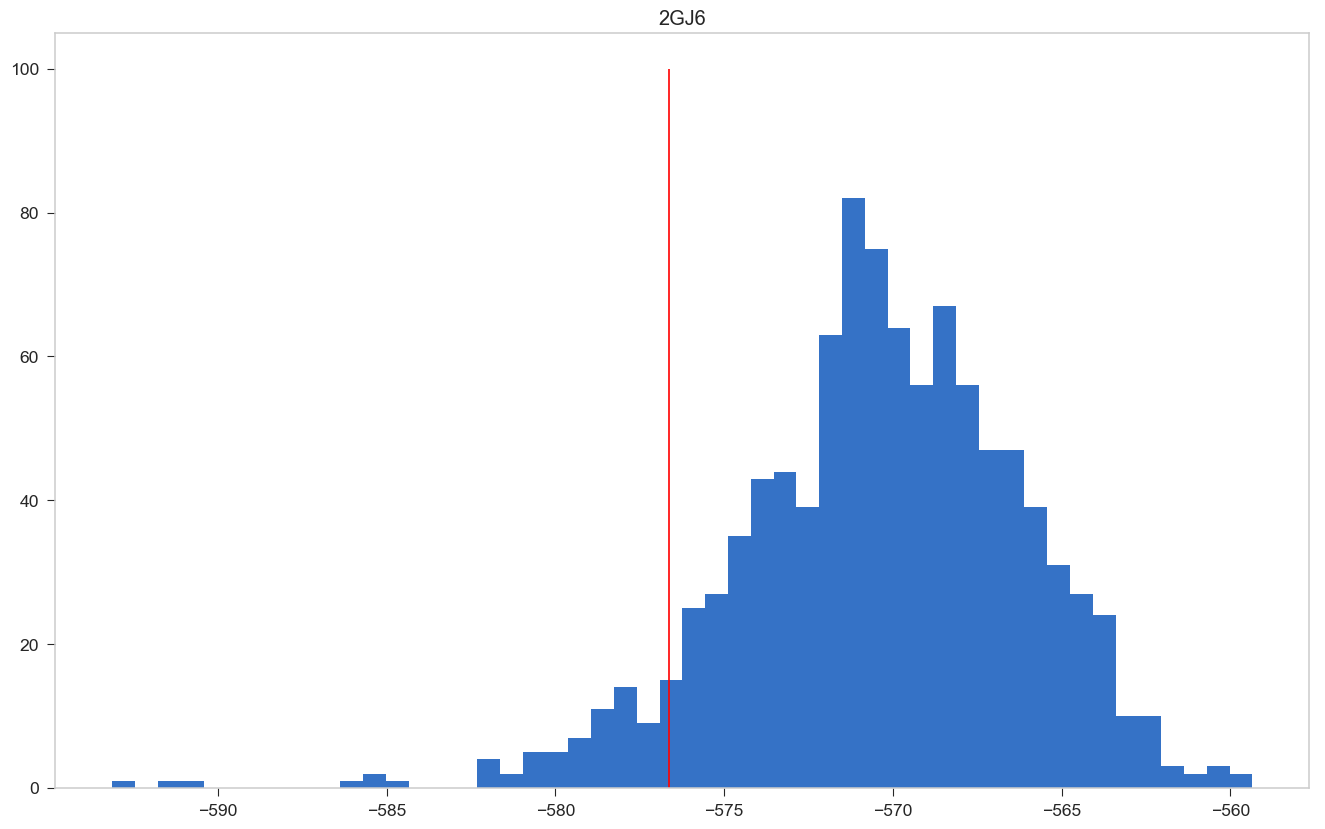

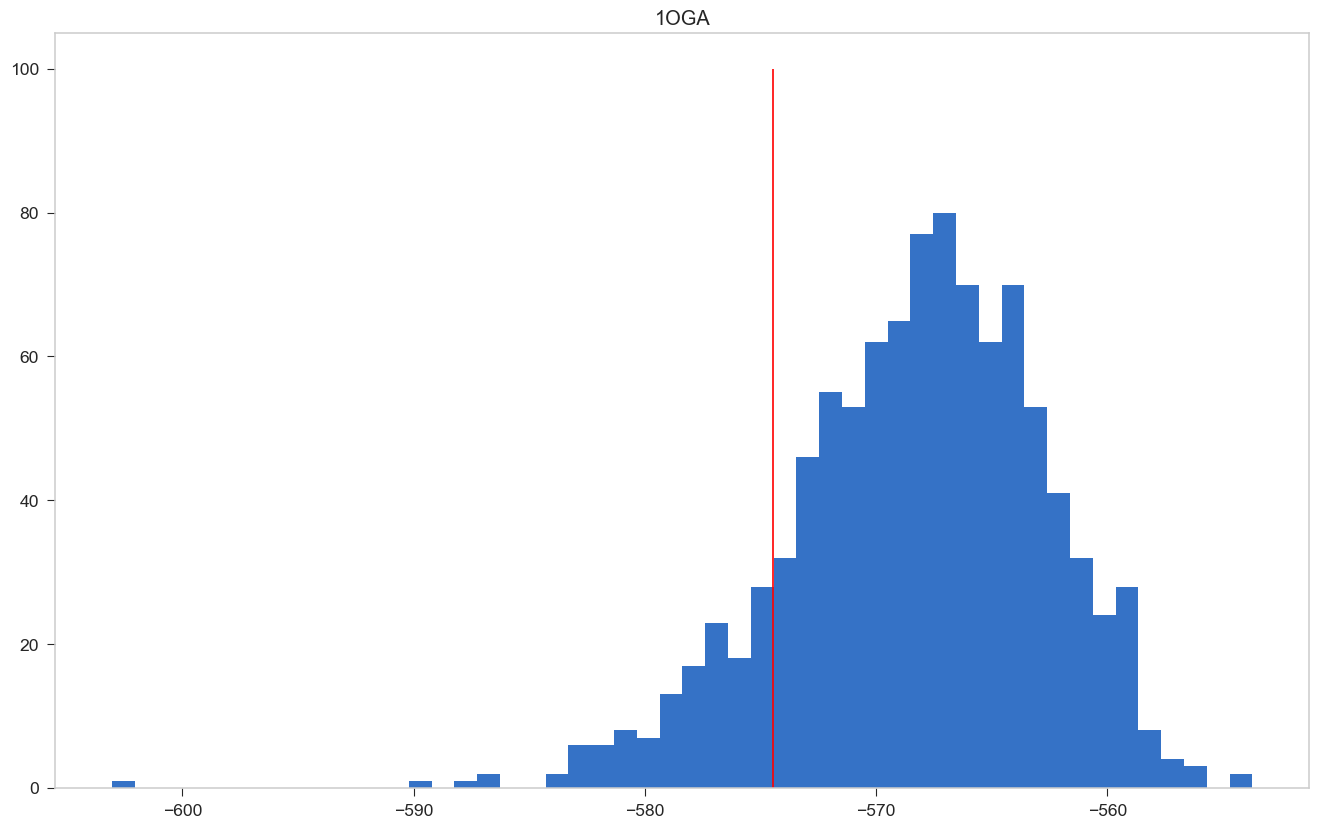

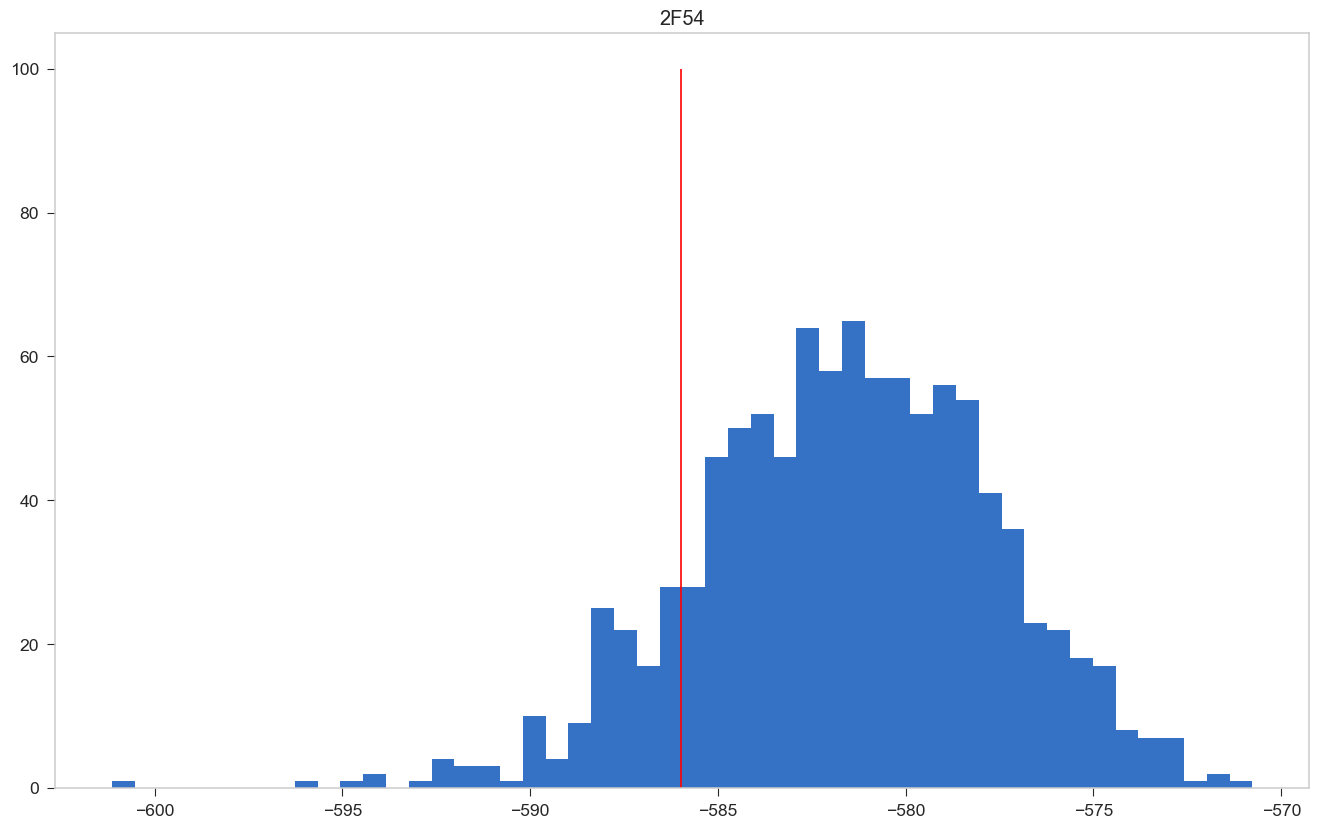

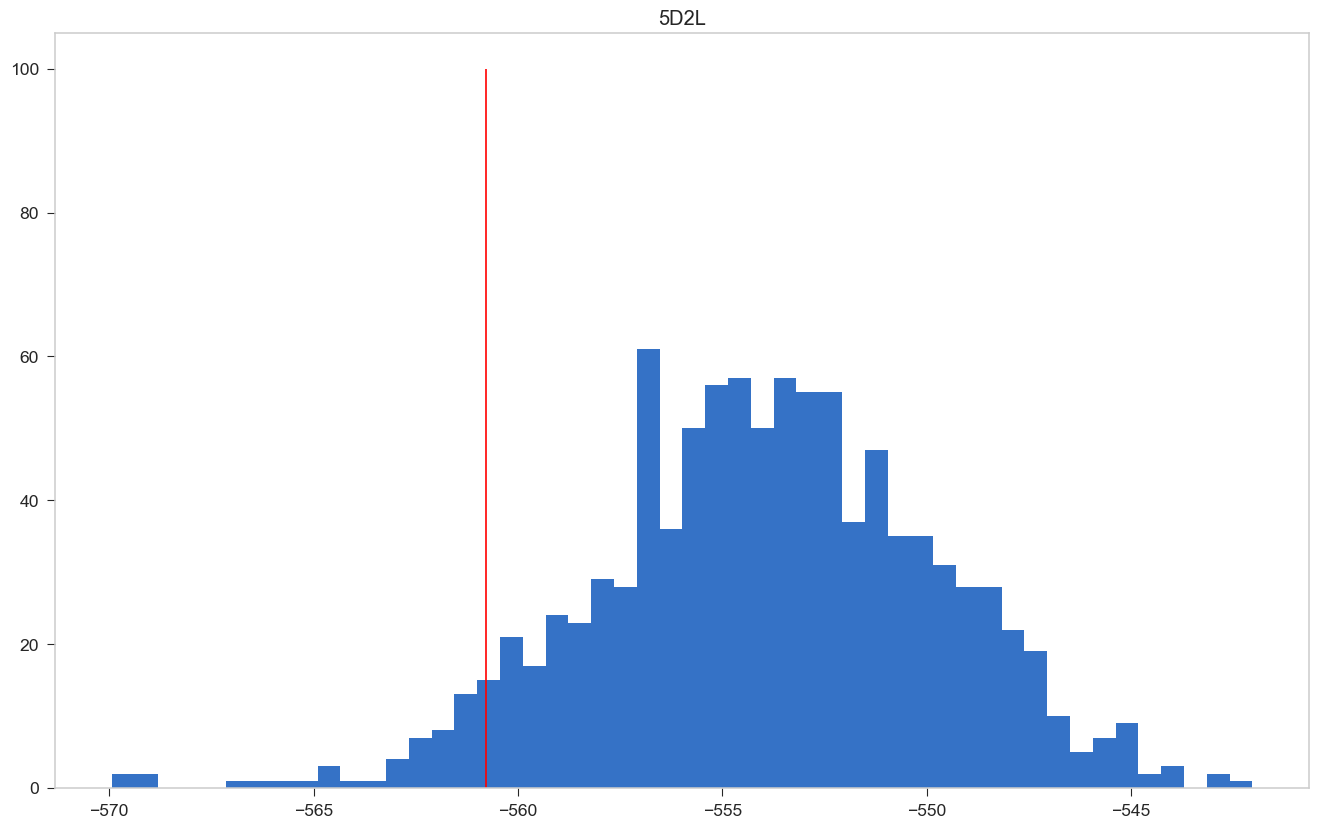

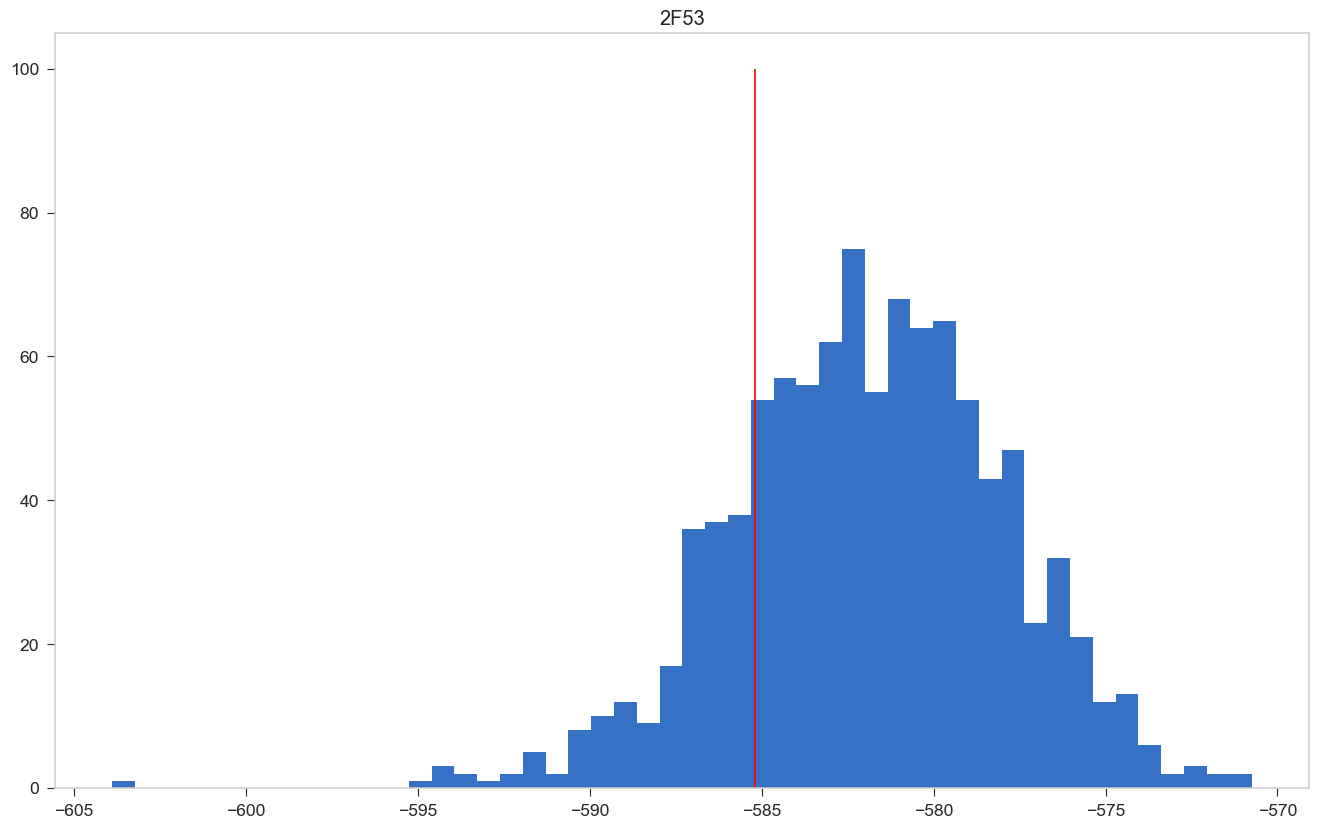

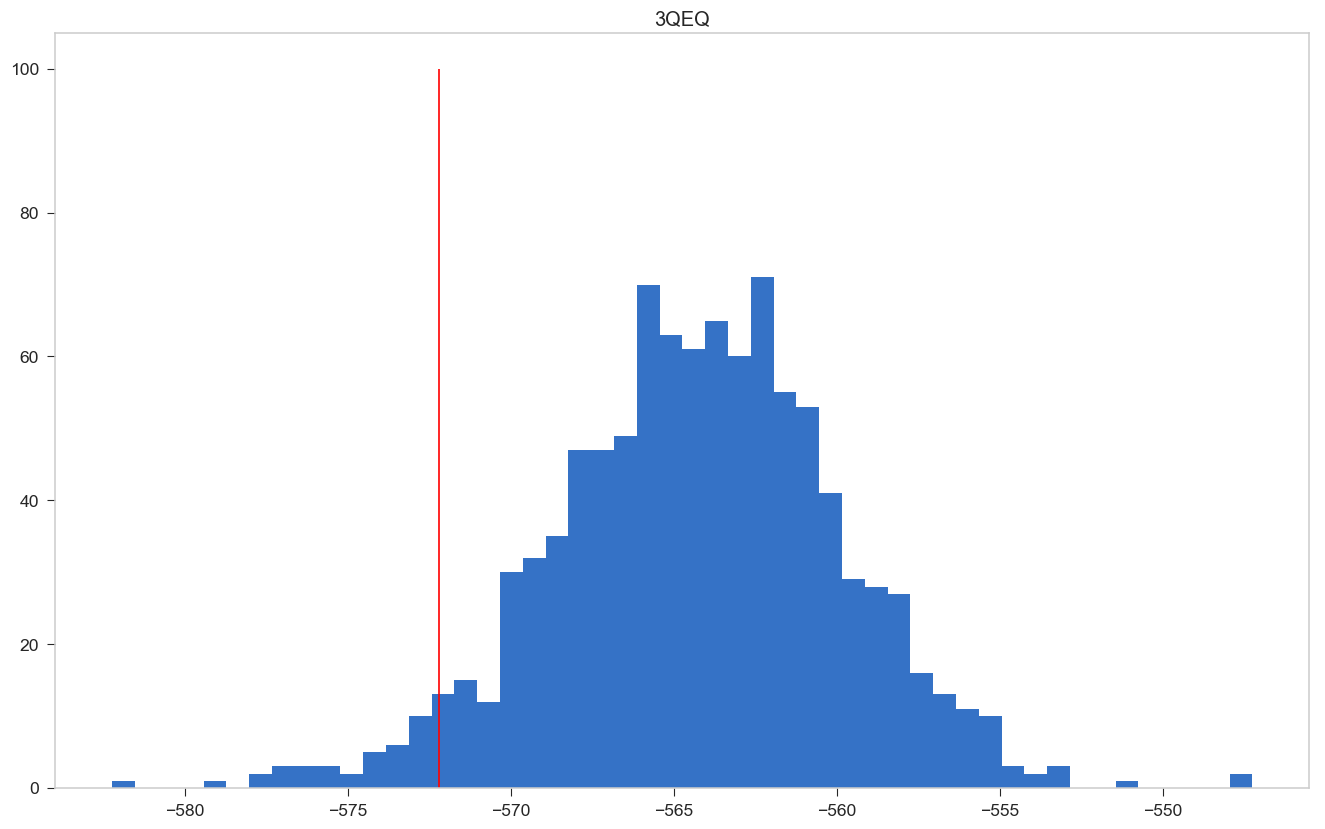

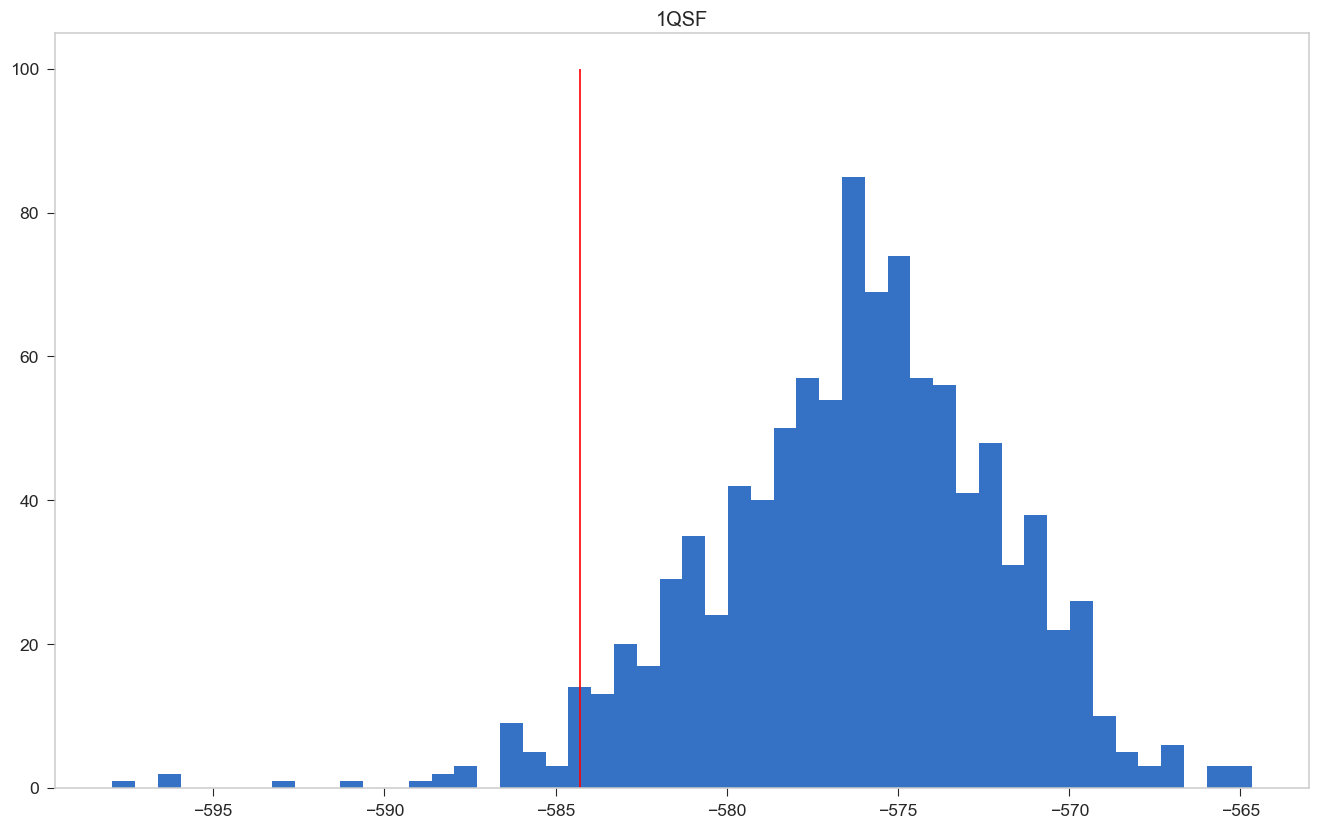

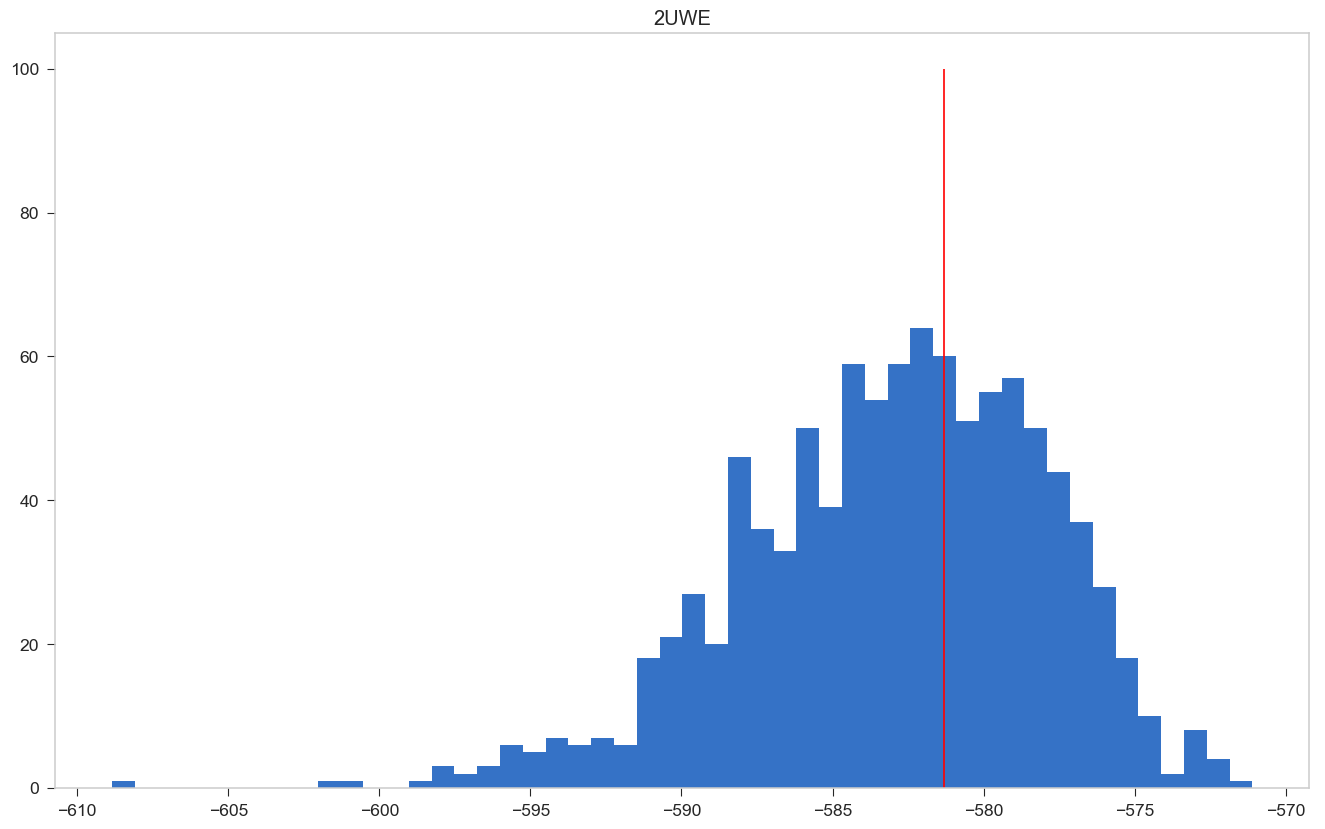

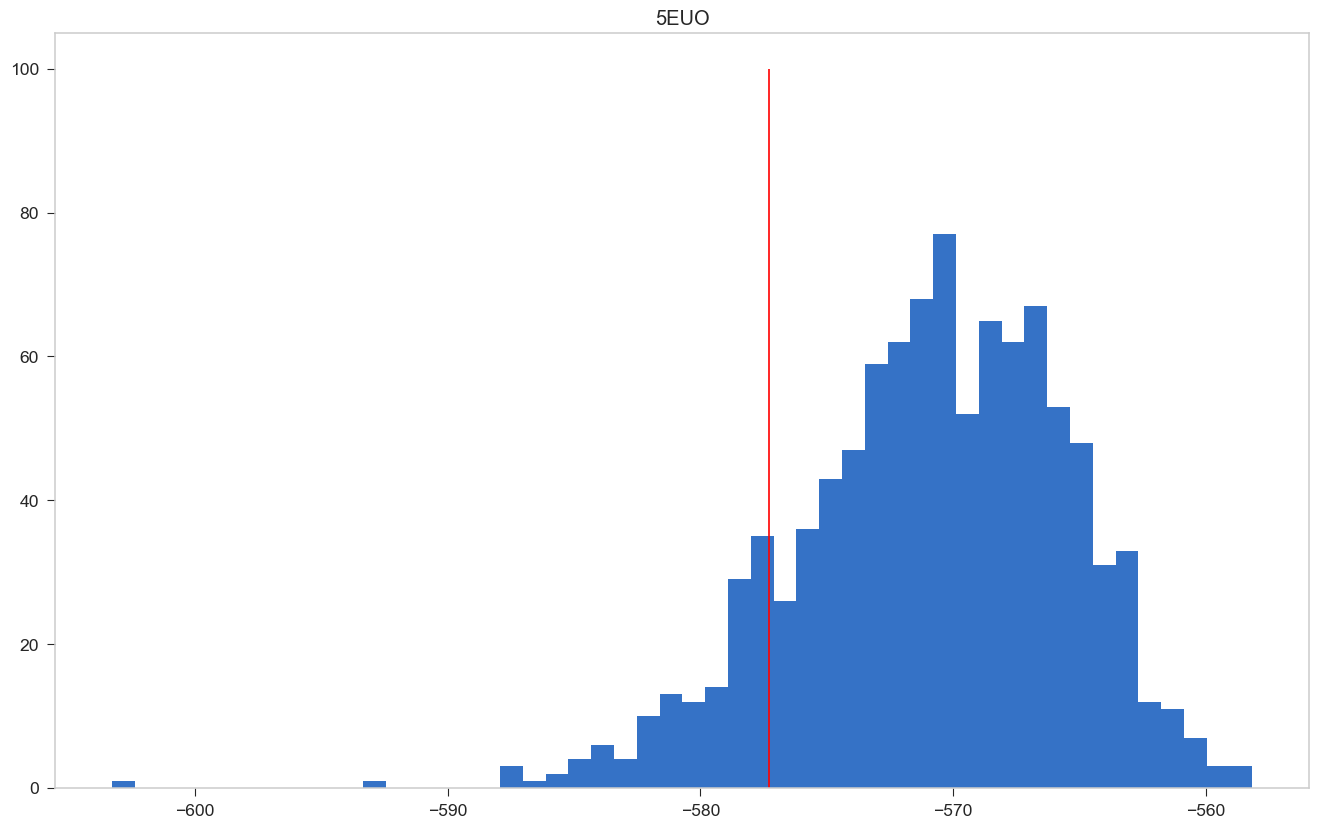

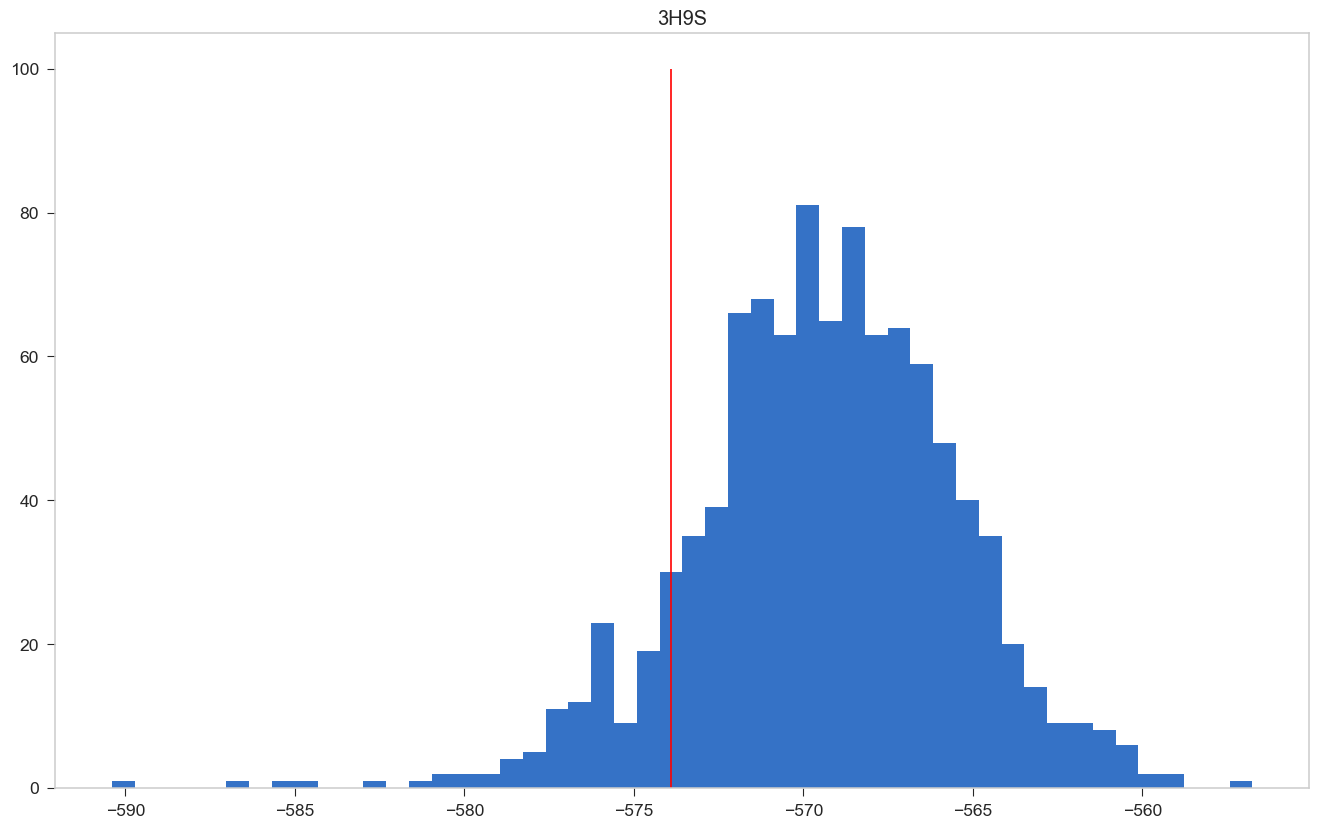

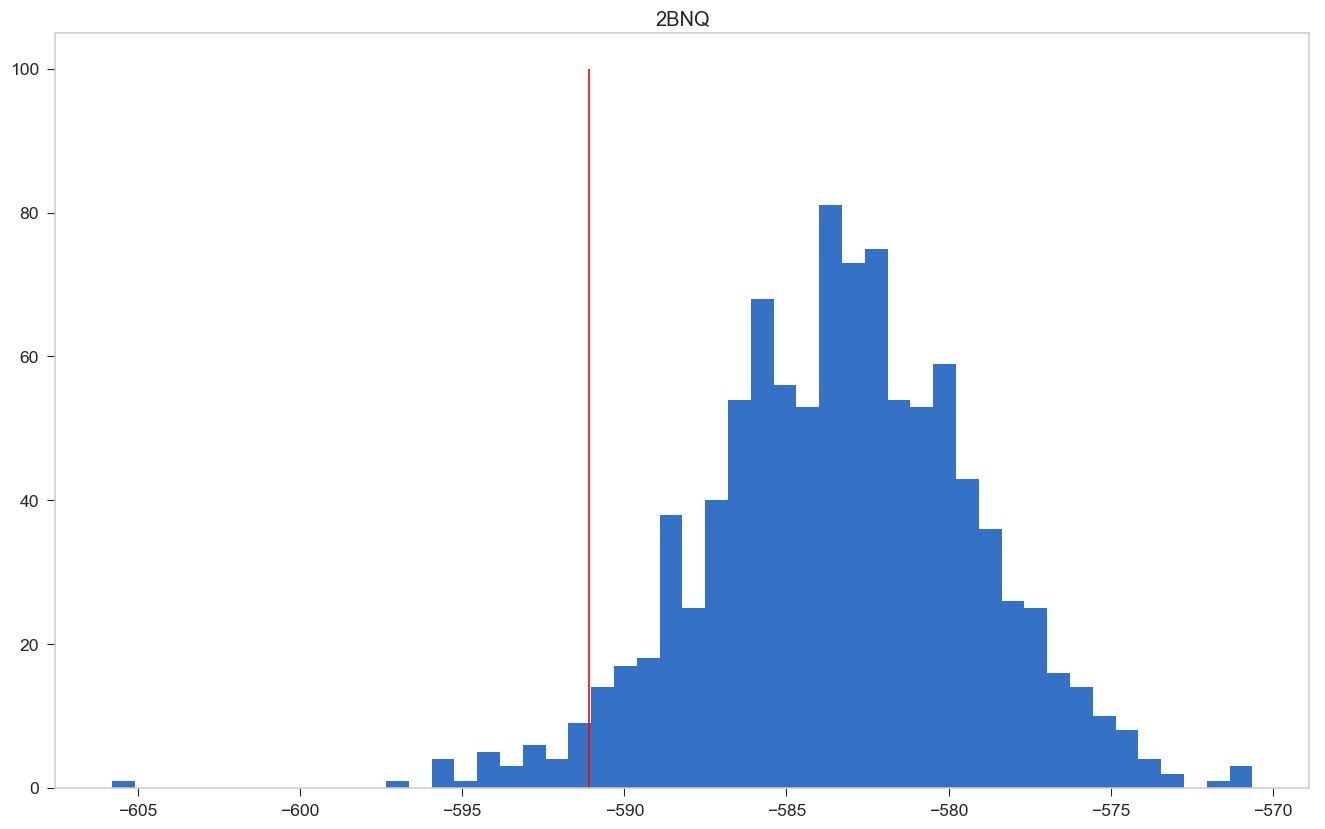

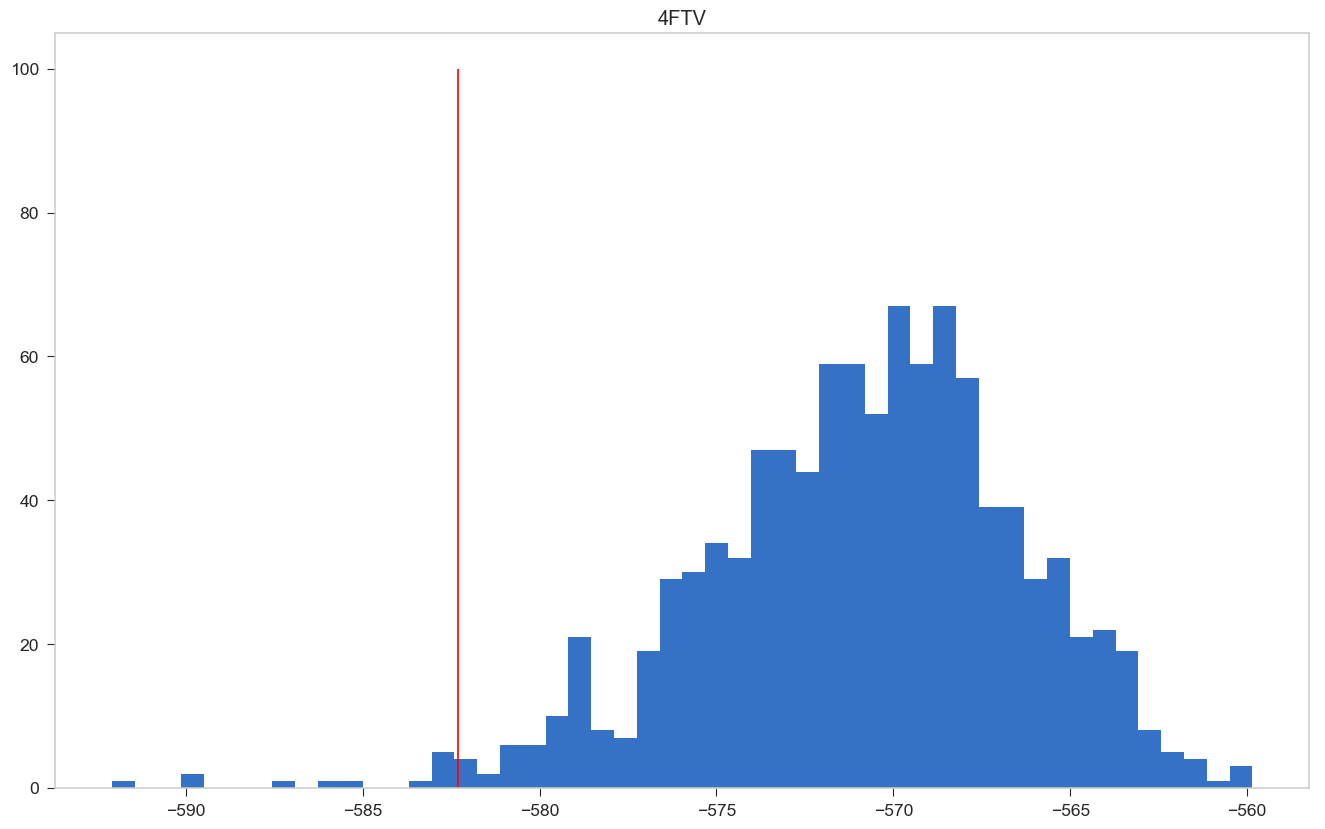

In [19]:
folder = "/Users/weilu/Dropbox/Optimization_Xfunnel/updated_figures_cutoff400/"
os.system(f"mkdir -p {folder}")
for name, e_native, e_decoy in zip(names, e_natives, e_decoys):
    # print(name)
    plt.figure()
    _ = plt.hist(e_decoy, bins=50)
    plt.vlines(e_native, ymin=0, ymax=100, color="red")
    _ = plt.title(name)
    plt.savefig(f"{folder}/{name}.png")
    

In [119]:
os.chdir("/Users/weilu/Research/server/sep_2019/peptide_optimization_specific_test/optimization/")
# evaluate_hamiltonian_wei(protein, hamiltonian, training_set_file, gamma_file_name, test_decoy_method, num_decoys, use_filtered_gammas=True, outputDecoy=False, **kwargs)
protein = "2BNQ"
# protein = "4FTV"
hamiltonian = "phi_list.txt"
training_set_file =  "protein_list" 
gamma_file_name = "/Users/weilu/Research/server/sep_2019/saved_gammas/trial_4_cutoff100_impose_Aprime_constraint"
test_decoy_method = "shuffle"
num_decoys = 10
use_filtered_gammas = False
phi_list = read_phi_list(hamiltonian)
training_set = read_column_from_file(training_set_file, 1)
# read in Hamiltonian
# Find out how many total phi_i there are and get full parameter string
total_phis, full_parameters_string, num_phis = get_total_phis_and_parameter_string(
    phi_list, training_set, mode=0)
# print(total_phis, full_parameters_string, num_phis)
# read in corresponding gammas
# if use_filtered_gammas:
#     gamma_file_name = "%s%s_%s_gamma_filtered" % (
#         gammas_directory, training_set_file.split('/')[-1].split('.')[0], full_parameters_string)
# else:
#     pass
#     gamma_file_name = "%s%s_%s_gamma" % (gammas_directory, training_set_file.split(
#         '/')[-1].split('.')[0], full_parameters_string)

# Need to filter out the complex number if in the "filtered" mode;
# if use_filtered_gammas:
#     gamma = np.loadtxt(gamma_file_name, dtype=complex, converters={
#                        0: lambda s: complex(s.decode().replace('+-', '-'))})
# else:
#     gamma = np.loadtxt(gamma_file_name)
# gamma = np.loadtxt(gamma_file_name, dtype=complex, converters={
#                             0: lambda s: complex(s.decode().replace('+-', '-'))})
gamma = np.loadtxt(gamma_file_name)
# read in corresponding phis (native and decoys)
phi_native = read_native_phi(protein, phi_list, total_phis, mode=0)
phi_i_decoy = read_decoy_phis(
    protein, phi_list, total_phis, num_phis, num_decoys, test_decoy_method, mode=0)
# perform dot products to get energies (native and decoys)
e_decoy = np.zeros(num_decoys)
# print(gamma.shape, phi_native.shape)
e_native = np.dot(gamma, phi_native)
for i_decoy in range(num_decoys):
    e_decoy[i_decoy] = np.dot(gamma, phi_i_decoy[i_decoy])
e_mg = np.average(e_decoy)
e_mg_std = np.std(e_decoy)
# calculate z-score
z_score = (e_mg - e_native) / e_mg_std

In [120]:
np.dot(gamma, phi_native)

-605.7814622516905